In [222]:
import pandas as pd
import numpy as np
import seaborn as sns

In [223]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [224]:
import os
import random

def seed_everything(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)

seed_everything(42) # Seed 고정

In [225]:
train = pd.read_csv('/content/drive/Othercomputers/내 Mac/공모전 준비/train.csv')
test = pd.read_csv('/content/drive/Othercomputers/내 Mac/공모전 준비/test.csv')

display(train.head())
display(test.head())

,ID,사고일시,요일,기상상태,시군구,도로형태,노면상태,사고유형,사고유형 - 세부분류,법규위반,...,가해운전자 상해정도,피해운전자 차종,피해운전자 성별,피해운전자 연령,피해운전자 상해정도,사망자수,중상자수,경상자수,부상자수,ECLO
0,ACCIDENT_00000,2019-01-01 00,화요일,맑음,대구광역시 중구 대신동,단일로 - 기타,건조,차대사람,길가장자리구역통행중,안전운전불이행,...,상해없음,보행자,여,70세,중상,0,1,0,0,5
1,ACCIDENT_00001,2019-01-01 00,화요일,흐림,대구광역시 달서구 감삼동,단일로 - 기타,건조,차대사람,보도통행중,기타,...,상해없음,보행자,남,61세,경상,0,0,1,0,3
2,ACCIDENT_00002,2019-01-01 01,화요일,맑음,대구광역시 수성구 두산동,단일로 - 기타,건조,차대사람,차도통행중,안전운전불이행,...,상해없음,보행자,남,38세,경상,0,0,1,0,3
3,ACCIDENT_00003,2019-01-01 02,화요일,맑음,대구광역시 북구 복현동,단일로 - 기타,건조,차대차,추돌,안전운전불이행,...,상해없음,승용,남,36세,중상,0,1,0,0,5
4,ACCIDENT_00004,2019-01-01 04,화요일,맑음,대구광역시 동구 신암동,단일로 - 기타,건조,차대차,추돌,안전운전불이행,...,상해없음,승용,남,52세,경상,0,0,1,0,3


,ID,사고일시,요일,기상상태,시군구,도로형태,노면상태,사고유형
0,ACCIDENT_39609,2022-01-01 01,토요일,맑음,대구광역시 수성구 상동,교차로 - 교차로안,건조,차대사람
1,ACCIDENT_39610,2022-01-01 01,토요일,맑음,대구광역시 수성구 지산동,단일로 - 기타,건조,차대사람
2,ACCIDENT_39611,2022-01-01 04,토요일,맑음,대구광역시 수성구 수성동2가,교차로 - 교차로안,건조,차대차
3,ACCIDENT_39612,2022-01-01 04,토요일,맑음,대구광역시 수성구 신매동,단일로 - 기타,건조,차대차
4,ACCIDENT_39613,2022-01-01 06,토요일,맑음,대구광역시 달서구 감삼동,교차로 - 교차로안,건조,차대차


In [226]:
print(train.columns)
print(test.columns)

Index(['ID', '사고일시', '요일', '기상상태', '시군구', '도로형태', '노면상태', '사고유형',
       '사고유형 - 세부분류', '법규위반', '가해운전자 차종', '가해운전자 성별', '가해운전자 연령', '가해운전자 상해정도',
       '피해운전자 차종', '피해운전자 성별', '피해운전자 연령', '피해운전자 상해정도', '사망자수', '중상자수',
       '경상자수', '부상자수', 'ECLO'],
      dtype='object')
Index(['ID', '사고일시', '요일', '기상상태', '시군구', '도로형태', '노면상태', '사고유형'], dtype='object')


In [227]:
train_df = train.drop(['ID'],axis=1)
test_df = test.drop(['ID'],axis=1)

In [228]:
train_df.head()

,사고일시,요일,기상상태,시군구,도로형태,노면상태,사고유형,사고유형 - 세부분류,법규위반,가해운전자 차종,...,가해운전자 상해정도,피해운전자 차종,피해운전자 성별,피해운전자 연령,피해운전자 상해정도,사망자수,중상자수,경상자수,부상자수,ECLO
0,2019-01-01 00,화요일,맑음,대구광역시 중구 대신동,단일로 - 기타,건조,차대사람,길가장자리구역통행중,안전운전불이행,승용,...,상해없음,보행자,여,70세,중상,0,1,0,0,5
1,2019-01-01 00,화요일,흐림,대구광역시 달서구 감삼동,단일로 - 기타,건조,차대사람,보도통행중,기타,승용,...,상해없음,보행자,남,61세,경상,0,0,1,0,3
2,2019-01-01 01,화요일,맑음,대구광역시 수성구 두산동,단일로 - 기타,건조,차대사람,차도통행중,안전운전불이행,승용,...,상해없음,보행자,남,38세,경상,0,0,1,0,3
3,2019-01-01 02,화요일,맑음,대구광역시 북구 복현동,단일로 - 기타,건조,차대차,추돌,안전운전불이행,승용,...,상해없음,승용,남,36세,중상,0,1,0,0,5
4,2019-01-01 04,화요일,맑음,대구광역시 동구 신암동,단일로 - 기타,건조,차대차,추돌,안전운전불이행,승용,...,상해없음,승용,남,52세,경상,0,0,1,0,3


## train, test 데이터 기간 확인하기

In [229]:
display(f"train : {train_df.iloc[0]['사고일시']} ~ {train_df.iloc[-1]['사고일시']}")
display(f"test : {test_df.iloc[0]['사고일시']} ~ {test_df.iloc[-1]['사고일시']}")

'train : 2019-01-01 00 ~ 2021-12-31 23'

'test : 2022-01-01 01 ~ 2022-12-31 21'

## **데이터 전처리**  

현재 '사고일시', '시군구', '도로형태' 컬럼은 반복되는 패턴으로 여러 정보를 포함하고 있습니다
이런 반복되는 패턴을 일반화하면 pandas에서 제공하는 str.extract를 통해 한 번에 추출 가능합니다  

## **파생 변수 생성 1 : 날짜, 시간정보 생성**

'사고일시' 컬럼으로 부터 연도, 월, 일, 시간 정보 추출 및 변환 합니다

In [230]:
time_pattern = r'(\d{4})-(\d{1,2})-(\d{1,2}) (\d{1,2})'

train_df[['연', '월', '일', '시간']] = train['사고일시'].str.extract(time_pattern)
train_df[['연', '월', '일', '시간']] = train_df[['연', '월', '일', '시간']].apply(pd.to_numeric) # 추출된 문자열을 수치화해줍니다
train_df = train_df.drop(columns=['사고일시']) # 정보 추출이 완료된 '사고일시' 컬럼은 제거합니다

# 해당 과정을 test_x에 대해서도 반복해줍니다
test_df[['연', '월', '일', '시간']] = test['사고일시'].str.extract(time_pattern)
test_df[['연', '월', '일', '시간']] = test_df[['연', '월', '일', '시간']].apply(pd.to_numeric)
test_df = test_df.drop(columns=['사고일시'])

display(f"columns of train_df : {train_df.columns}")
display(f"columns of test_df : {test_df.columns}")

"columns of train_df : Index(['요일', '기상상태', '시군구', '도로형태', '노면상태', '사고유형', '사고유형 - 세부분류', '법규위반',\n       '가해운전자 차종', '가해운전자 성별', '가해운전자 연령', '가해운전자 상해정도', '피해운전자 차종',\n       '피해운전자 성별', '피해운전자 연령', '피해운전자 상해정도', '사망자수', '중상자수', '경상자수', '부상자수',\n       'ECLO', '연', '월', '일', '시간'],\n      dtype='object')"

"columns of test_df : Index(['요일', '기상상태', '시군구', '도로형태', '노면상태', '사고유형', '연', '월', '일', '시간'], dtype='object')"

## **파생 변수 생성 2 : 공간(위치) 정보 생성**

'시군구' 컬럼으로부터 의미 있는 공산 정보를 추출 및 변환 합니다

In [231]:
location_pattern = r'(\S+) (\S+) (\S+)'

train_df[['도시', '구', '동']] = train['시군구'].str.extract(location_pattern)
train_df = train_df.drop(columns=['시군구'])

test_df[['도시', '구', '동']] = test['시군구'].str.extract(location_pattern)
test_df = test_df.drop(columns=['시군구'])

display(f"columns of train_df : {train_df.columns}")
display(f"columns of test_df : {test_df.columns}")

"columns of train_df : Index(['요일', '기상상태', '도로형태', '노면상태', '사고유형', '사고유형 - 세부분류', '법규위반', '가해운전자 차종',\n       '가해운전자 성별', '가해운전자 연령', '가해운전자 상해정도', '피해운전자 차종', '피해운전자 성별',\n       '피해운전자 연령', '피해운전자 상해정도', '사망자수', '중상자수', '경상자수', '부상자수', 'ECLO', '연',\n       '월', '일', '시간', '도시', '구', '동'],\n      dtype='object')"

"columns of test_df : Index(['요일', '기상상태', '도로형태', '노면상태', '사고유형', '연', '월', '일', '시간', '도시', '구',\n       '동'],\n      dtype='object')"

## **파생 변수 추출 3 : 도로 형태 정보 추출**  

'도로형태' 컬럼은 '단일로 - 기타'와 같은 패턴으로 구성되어 있습니다. 이를 두종류의 독립된 정보로 보고 두개의 컬럼으로 분리하여 생성합니다.

In [232]:
road_pattern = r'(.+) - (.+)'

train_df[['도로형태1', '도로형태2']] = train['도로형태'].str.extract(road_pattern)
train_df = train_df.drop(columns=['도로형태'])

test_df[['도로형태1', '도로형태2']] = test['도로형태'].str.extract(road_pattern)
test_df = test_df.drop(columns=['도로형태'])

display(f"columns of train_df : {train_df.columns}")
display(f"columns of test_df : {test_df.columns}")

"columns of train_df : Index(['요일', '기상상태', '노면상태', '사고유형', '사고유형 - 세부분류', '법규위반', '가해운전자 차종',\n       '가해운전자 성별', '가해운전자 연령', '가해운전자 상해정도', '피해운전자 차종', '피해운전자 성별',\n       '피해운전자 연령', '피해운전자 상해정도', '사망자수', '중상자수', '경상자수', '부상자수', 'ECLO', '연',\n       '월', '일', '시간', '도시', '구', '동', '도로형태1', '도로형태2'],\n      dtype='object')"

"columns of test_df : Index(['요일', '기상상태', '노면상태', '사고유형', '연', '월', '일', '시간', '도시', '구', '동',\n       '도로형태1', '도로형태2'],\n      dtype='object')"

## **전처리 결과 확인**

지금까지 전처리한 결과를 확인해 봅시다

In [233]:
display(train_df.head())
display(test_df.head())

,요일,기상상태,노면상태,사고유형,사고유형 - 세부분류,법규위반,가해운전자 차종,가해운전자 성별,가해운전자 연령,가해운전자 상해정도,...,ECLO,연,월,일,시간,도시,구,동,도로형태1,도로형태2
0,화요일,맑음,건조,차대사람,길가장자리구역통행중,안전운전불이행,승용,여,51세,상해없음,...,5,2019,1,1,0,대구광역시,중구,대신동,단일로,기타
1,화요일,흐림,건조,차대사람,보도통행중,기타,승용,남,39세,상해없음,...,3,2019,1,1,0,대구광역시,달서구,감삼동,단일로,기타
2,화요일,맑음,건조,차대사람,차도통행중,안전운전불이행,승용,남,70세,상해없음,...,3,2019,1,1,1,대구광역시,수성구,두산동,단일로,기타
3,화요일,맑음,건조,차대차,추돌,안전운전불이행,승용,남,49세,상해없음,...,5,2019,1,1,2,대구광역시,북구,복현동,단일로,기타
4,화요일,맑음,건조,차대차,추돌,안전운전불이행,승용,남,30세,상해없음,...,3,2019,1,1,4,대구광역시,동구,신암동,단일로,기타


,요일,기상상태,노면상태,사고유형,연,월,일,시간,도시,구,동,도로형태1,도로형태2
0,토요일,맑음,건조,차대사람,2022,1,1,1,대구광역시,수성구,상동,교차로,교차로안
1,토요일,맑음,건조,차대사람,2022,1,1,1,대구광역시,수성구,지산동,단일로,기타
2,토요일,맑음,건조,차대차,2022,1,1,4,대구광역시,수성구,수성동2가,교차로,교차로안
3,토요일,맑음,건조,차대차,2022,1,1,4,대구광역시,수성구,신매동,단일로,기타
4,토요일,맑음,건조,차대차,2022,1,1,6,대구광역시,달서구,감삼동,교차로,교차로안


In [234]:
train_df.drop('도시',axis=1,inplace=True)
test_df.drop('도시',axis=1,inplace=True)

## 추가 데이터 불러오기

- 대구 보안등 정보
- 대구 어린이 보호 구역 정보
- 대구 주차장 정보
- 대구 CCTV 정보
- countrywide_accident

In [235]:
light = pd.read_csv('/content/drive/Othercomputers/내 Mac/공모전 준비/대구 보안등 정보.csv',encoding='cp949')
light.head()

,보안등위치명,설치개수,소재지도로명주소,소재지지번주소,위도,경도,설치연도,설치형태
0,대명1동1,1,대구광역시 남구 현충로 155,대구광역시 남구 대명동 1722-4,35.846703,128.579803,2016.0,한전주
1,대명1동2,1,대구광역시 남구 현충로31길 10-1,대구광역시 남구 대명동 1723-11,35.846863,128.579406,2016.0,한전주
2,대명1동3,1,대구광역시 남구 현충로31길 9-8,대구광역시 남구 대명동 1722-56,35.846341,128.579342,2017.0,건축물
3,대명1동4,2,대구광역시 남구 현충로31길 19-11,대구광역시 남구 대명동 1722-41,35.846368,128.578922,2016.0,한전주
4,대명1동5,1,대구광역시 남구 현충로29길 22-2,대구광역시 남구 대명동 1721-22,35.845995,128.578858,2016.0,한전주


In [236]:
def black_split_1(x):
    return x.split(' ')[1]

In [237]:
def black_split_2(x):
    try:
        return x.split(' ')[2]
    except:
        return x

In [238]:
light['구'] = light['소재지지번주소'].apply(black_split_1)
light['동'] = light['소재지지번주소'].apply(black_split_2)
light.head()

,보안등위치명,설치개수,소재지도로명주소,소재지지번주소,위도,경도,설치연도,설치형태,구,동
0,대명1동1,1,대구광역시 남구 현충로 155,대구광역시 남구 대명동 1722-4,35.846703,128.579803,2016.0,한전주,남구,대명동
1,대명1동2,1,대구광역시 남구 현충로31길 10-1,대구광역시 남구 대명동 1723-11,35.846863,128.579406,2016.0,한전주,남구,대명동
2,대명1동3,1,대구광역시 남구 현충로31길 9-8,대구광역시 남구 대명동 1722-56,35.846341,128.579342,2017.0,건축물,남구,대명동
3,대명1동4,2,대구광역시 남구 현충로31길 19-11,대구광역시 남구 대명동 1722-41,35.846368,128.578922,2016.0,한전주,남구,대명동
4,대명1동5,1,대구광역시 남구 현충로29길 22-2,대구광역시 남구 대명동 1721-22,35.845995,128.578858,2016.0,한전주,남구,대명동


In [239]:
pattern = r'(\w+동)'
light['동'] = light['동'].str.extract(pattern)

In [240]:
dong_install = light.groupby(['동'])[['설치개수']].mean()
dong_install

,설치개수
동,
3가동,1.000000
3동,1.000000
각산동,1.014599
갈산동,1.000000
감삼동,1.000000
...,...
호산동,1.000000
화전동,1.000000
황금1동,1.000000


In [241]:
chil_info = pd.read_csv('/content/drive/Othercomputers/내 Mac/공모전 준비/대구 어린이 보호 구역 정보.csv',encoding='cp949')
chil_info.head()

,시설종류,대상시설명,소재지도로명주소,소재지지번주소,위도,경도,관리기관명,관할경찰서명,CCTV설치여부,CCTV설치대수,보호구역도로폭,데이터기준일자
0,초등학교,남도초등학교,대구광역시 남구 현충동길 74(대명동),대구광역시 남구 대명동 1709,35.845027,128.581402,대구광역시,남부경찰서,Y,7.0,6~8,2020-03-23
1,초등학교,영선초등학교,대구광역시 남구 영선길96(이천동),대구광역시 남구 이천동 477,35.852901,128.596014,대구광역시,남부경찰서,Y,8.0,6~10,2020-03-23
2,초등학교,성명초등학교,대구광역시 남구 성당로 30길 55(대명동),대구광역시 남구 대명동 3050,35.845152,128.570825,대구광역시,남부경찰서,Y,14.0,8~12,2020-03-23
3,초등학교,남덕초등학교,대구광역시 남구 앞산순환로 93길 33,대구광역시 남구 대명동 531-1,35.833042,128.573949,대구광역시,남부경찰서,Y,6.0,6~8,2020-03-23
4,초등학교,대명초등학교,대구광역시 남구 대명로 110,대구광역시 남구 대명동 960,35.838869,128.568889,대구광역시,남부경찰서,Y,5.0,6~10,2020-03-23


In [242]:
def black_split_1(x):
    try:
        return x.split(' ')[1]
    except:
        return x

In [243]:
def black_split_2(x):
    try:
        return x.split(' ')[2]
    except:
        return x

In [244]:
chil_info['구'] = chil_info['소재지지번주소'].apply(black_split_1)
chil_info['동'] = chil_info['소재지지번주소'].apply(black_split_2)

chil_info.head()

,시설종류,대상시설명,소재지도로명주소,소재지지번주소,위도,경도,관리기관명,관할경찰서명,CCTV설치여부,CCTV설치대수,보호구역도로폭,데이터기준일자,구,동
0,초등학교,남도초등학교,대구광역시 남구 현충동길 74(대명동),대구광역시 남구 대명동 1709,35.845027,128.581402,대구광역시,남부경찰서,Y,7.0,6~8,2020-03-23,남구,대명동
1,초등학교,영선초등학교,대구광역시 남구 영선길96(이천동),대구광역시 남구 이천동 477,35.852901,128.596014,대구광역시,남부경찰서,Y,8.0,6~10,2020-03-23,남구,이천동
2,초등학교,성명초등학교,대구광역시 남구 성당로 30길 55(대명동),대구광역시 남구 대명동 3050,35.845152,128.570825,대구광역시,남부경찰서,Y,14.0,8~12,2020-03-23,남구,대명동
3,초등학교,남덕초등학교,대구광역시 남구 앞산순환로 93길 33,대구광역시 남구 대명동 531-1,35.833042,128.573949,대구광역시,남부경찰서,Y,6.0,6~8,2020-03-23,남구,대명동
4,초등학교,대명초등학교,대구광역시 남구 대명로 110,대구광역시 남구 대명동 960,35.838869,128.568889,대구광역시,남부경찰서,Y,5.0,6~10,2020-03-23,남구,대명동


In [245]:
pattern = r'(\w+동)'
chil_info['동'] = chil_info['동'].str.extract(pattern)

In [246]:
cctv_count = chil_info[chil_info['CCTV설치대수'].notnull()].groupby(['동'])[['CCTV설치대수']].mean()
cctv_count

,CCTV설치대수
동,
검단동,4.000000
고성동,2.000000
관음동,4.400000
구암동,3.600000
국우동,2.666667
남산동,6.777778
남일동,1.000000
노원동,3.000000
대명동,4.076923


In [247]:
park = pd.read_csv('/content/drive/Othercomputers/내 Mac/공모전 준비/대구 주차장 정보.csv',encoding='cp949')
park.head()

,주차장관리번호,주차장명,주차장구분,주차장유형,소재지도로명주소,소재지지번주소,주차구획수,급지구분,부제시행구분,운영요일,...,추가단위시간,추가단위요금,1일주차권요금적용시간,1일주차권요금,월정기권요금,결제방법,특기사항,위도,경도,데이터기준일자
0,153-2-000001,봉덕공영주차장,공영,노외,대구광역시 남구 중앙대로22길 199,대구광역시 남구 봉덕동 1002-69,62,1,미시행,평일+토요일+공휴일,...,10.0,200.0,210.0,4000.0,70000.0,현금,"경차,장애인차량,국가유공자차량,승용차요일제차량,저공해차량, 환경친화적 자동차 50 할인.",35.842206,128.601725,2020-01-01
1,153-2-000002,봉삼공영주차장,공영,노외,NaN,대구광역시 남구 봉덕동 687-8,36,1,미시행,평일+토요일+공휴일,...,10.0,200.0,210.0,4000.0,70000.0,현금,"경차,장애인차량,국가유공자차량,승용차요일제차량,저공해차량, 환경친화적 자동차 50 할인.",35.842811,128.597209,2020-01-01
2,153-2-000003,대명2동공영주차장,공영,노외,대구광역시 남구 중앙대로45길 57,대구광역시 남구 대명동 1803-10,31,1,미시행,평일+토요일+공휴일,...,10.0,200.0,210.0,4000.0,40000.0,현금,"경차,장애인차량,국가유공자차량,승용차요일제차량,저공해차량, 환경친화적 자동차 50 할인.",35.855011,128.589359,2020-01-01
3,153-2-000004,고산골공영주차장,공영,노외,대구광역시 남구 용두2길 43,대구광역시 남구 봉덕동 1256,88,2,미시행,평일+토요일+공휴일,...,10.0,100.0,210.0,2000.0,20000.0,현금,"경차,장애인차량,국가유공자차량,승용차요일제차량,저공해차량, 환경친화적 자동차 50 할인.",35.830066,128.603443,2020-01-01
4,153-2-000005,봉덕시장공영주차장,공영,노외,대구광역시 남구 봉덕로25길 6,대구광역시 남구 봉덕동 976-5,32,1,미시행,평일+토요일+공휴일,...,10.0,200.0,160.0,3000.0,70000.0,현금,"경차,장애인차량,국가유공자차량,승용차요일제차량,저공해차량, 환경친화적 자동차 50 할인.",35.844925,128.602667,2020-01-01


In [248]:
park.columns

Index(['주차장관리번호', '주차장명', '주차장구분', '주차장유형', '소재지도로명주소', '소재지지번주소', '주차구획수',
       '급지구분', '부제시행구분', '운영요일', '평일운영시작시각', '평일운영종료시각', '토요일운영시작시각',
       '토요일운영종료시각', '공휴일운영시작시각', '공휴일운영종료시각', '요금정보', '주차기본시간', '주차기본요금',
       '추가단위시간', '추가단위요금', '1일주차권요금적용시간', '1일주차권요금', '월정기권요금', '결제방법', '특기사항',
       '위도', '경도', '데이터기준일자'],
      dtype='object')

In [249]:
cctv = pd.read_csv('/content/drive/Othercomputers/내 Mac/공모전 준비/대구 CCTV 정보.csv',encoding='cp949')
cctv.head()

,무인교통단속카메라관리번호,시도명,시군구명,도로종류,도로노선번호,도로노선명,도로노선방향,소재지도로명주소,소재지지번주소,위도,경도,설치장소,단속구분,제한속도,단속구간위치구분,과속단속구간길이,보호구역구분,설치연도
0,주차12,대구광역시,남구,시도,NaN,대명로,3,대구광역시 남구 대명로 162,대구광역시 남구 대명동 903-13,35.838857,128.575418,안지랑네거리1 버스정류장,4,0,NaN,NaN,99.0,2010.0
1,주차13,대구광역시,남구,시도,NaN,봉덕로,3,대구광역시 남구 봉덕로 135,대구광역시 남구 봉덕동 853-8,35.844653,128.604619,효성백년가약,4,0,NaN,NaN,99.0,2013.0
2,주차14,대구광역시,남구,시도,NaN,대봉로,3,대구광역시 남구 봉덕로 134,대구광역시 남구 봉덕동 866-46,35.844183,128.604815,강변코오롱하늘채,4,0,NaN,NaN,99.0,2013.0
3,주차15,대구광역시,남구,시도,NaN,큰골길,3,대구광역시 남구 큰골길 200,대구광역시 남구 대명동 2680-17,35.834798,128.585284,보성청록타운,4,0,NaN,NaN,99.0,2014.0
4,주차16,대구광역시,남구,시도,NaN,큰골길,3,대구광역시 남구 큰골길 243,대구광역시 남구 봉덕동 1616,35.832728,128.588324,환경차고지,4,0,NaN,NaN,99.0,2014.0


In [250]:
cctv['구'] = cctv['소재지지번주소'].apply(black_split_1)
cctv['동'] = cctv['소재지지번주소'].apply(black_split_2)
cctv.head()

,무인교통단속카메라관리번호,시도명,시군구명,도로종류,도로노선번호,도로노선명,도로노선방향,소재지도로명주소,소재지지번주소,위도,경도,설치장소,단속구분,제한속도,단속구간위치구분,과속단속구간길이,보호구역구분,설치연도,구,동
0,주차12,대구광역시,남구,시도,NaN,대명로,3,대구광역시 남구 대명로 162,대구광역시 남구 대명동 903-13,35.838857,128.575418,안지랑네거리1 버스정류장,4,0,NaN,NaN,99.0,2010.0,남구,대명동
1,주차13,대구광역시,남구,시도,NaN,봉덕로,3,대구광역시 남구 봉덕로 135,대구광역시 남구 봉덕동 853-8,35.844653,128.604619,효성백년가약,4,0,NaN,NaN,99.0,2013.0,남구,봉덕동
2,주차14,대구광역시,남구,시도,NaN,대봉로,3,대구광역시 남구 봉덕로 134,대구광역시 남구 봉덕동 866-46,35.844183,128.604815,강변코오롱하늘채,4,0,NaN,NaN,99.0,2013.0,남구,봉덕동
3,주차15,대구광역시,남구,시도,NaN,큰골길,3,대구광역시 남구 큰골길 200,대구광역시 남구 대명동 2680-17,35.834798,128.585284,보성청록타운,4,0,NaN,NaN,99.0,2014.0,남구,대명동
4,주차16,대구광역시,남구,시도,NaN,큰골길,3,대구광역시 남구 큰골길 243,대구광역시 남구 봉덕동 1616,35.832728,128.588324,환경차고지,4,0,NaN,NaN,99.0,2014.0,남구,봉덕동


In [251]:
speed_cctv = cctv[cctv['제한속도'] > 0].groupby(['동'])[['제한속도']].mean()
speed_cctv

,제한속도
동,
가창면,54.117647
가천동,60.000000
각산동,40.000000
갈산동,50.000000
감삼동,52.500000
...,...
호산동,45.000000
화원읍,50.512821
황금동,52.222222


In [252]:
countrywide = pd.read_csv('/content/drive/Othercomputers/내 Mac/공모전 준비/countrywide_accident.csv')
countrywide.head()

,ID,사고일시,요일,기상상태,시군구,도로형태,노면상태,사고유형,사고유형 - 세부분류,법규위반,...,가해운전자 상해정도,피해운전자 차종,피해운전자 성별,피해운전자 연령,피해운전자 상해정도,사망자수,중상자수,경상자수,부상자수,ECLO
0,COUNTRYWIDE_ACCIDENT_000000,2019-01-01 00,화요일,맑음,서울특별시 강서구 방화동,교차로 - 교차로횡단보도내,건조,차대사람,횡단중,보행자보호의무위반,...,상해없음,보행자,남,40세,경상,0,0,1,0,3
1,COUNTRYWIDE_ACCIDENT_000001,2019-01-01 00,화요일,맑음,경기도 포천시 소흘읍,교차로 - 교차로안,건조,차대차,기타,직진우회전진행방해,...,상해없음,이륜,남,20세,경상,0,0,1,0,3
2,COUNTRYWIDE_ACCIDENT_000002,2019-01-01 00,화요일,맑음,경기도 양주시 고암동,교차로 - 교차로안,건조,차대차,측면충돌,신호위반,...,상해없음,이륜,남,17세,중상,0,1,0,0,5
3,COUNTRYWIDE_ACCIDENT_000003,2019-01-01 00,화요일,맑음,경기도 남양주시 다산동,기타 - 기타,건조,차대사람,횡단중,보행자보호의무위반,...,상해없음,보행자,남,10세,중상,0,2,0,0,10
4,COUNTRYWIDE_ACCIDENT_000004,2019-01-01 00,화요일,맑음,인천광역시 부평구 부평동,교차로 - 교차로안,건조,차대차,측면충돌,신호위반,...,상해없음,승용,남,56세,경상,0,0,2,1,7


In [253]:
countrywide_df = countrywide.drop(['ID'],axis=1)
countrywide_df.head()

,사고일시,요일,기상상태,시군구,도로형태,노면상태,사고유형,사고유형 - 세부분류,법규위반,가해운전자 차종,...,가해운전자 상해정도,피해운전자 차종,피해운전자 성별,피해운전자 연령,피해운전자 상해정도,사망자수,중상자수,경상자수,부상자수,ECLO
0,2019-01-01 00,화요일,맑음,서울특별시 강서구 방화동,교차로 - 교차로횡단보도내,건조,차대사람,횡단중,보행자보호의무위반,승용,...,상해없음,보행자,남,40세,경상,0,0,1,0,3
1,2019-01-01 00,화요일,맑음,경기도 포천시 소흘읍,교차로 - 교차로안,건조,차대차,기타,직진우회전진행방해,승용,...,상해없음,이륜,남,20세,경상,0,0,1,0,3
2,2019-01-01 00,화요일,맑음,경기도 양주시 고암동,교차로 - 교차로안,건조,차대차,측면충돌,신호위반,승용,...,상해없음,이륜,남,17세,중상,0,1,0,0,5
3,2019-01-01 00,화요일,맑음,경기도 남양주시 다산동,기타 - 기타,건조,차대사람,횡단중,보행자보호의무위반,승용,...,상해없음,보행자,남,10세,중상,0,2,0,0,10
4,2019-01-01 00,화요일,맑음,인천광역시 부평구 부평동,교차로 - 교차로안,건조,차대차,측면충돌,신호위반,승용,...,상해없음,승용,남,56세,경상,0,0,2,1,7


### 데이터 합치기

- dong_install
- cctv_count
- speed_cctv

In [254]:
train_df.tail()

,요일,기상상태,노면상태,사고유형,사고유형 - 세부분류,법규위반,가해운전자 차종,가해운전자 성별,가해운전자 연령,가해운전자 상해정도,...,부상자수,ECLO,연,월,일,시간,구,동,도로형태1,도로형태2
39604,금요일,맑음,건조,차대차,측면충돌,신호위반,승용,여,52세,상해없음,...,0,3,2021,12,31,19,수성구,수성동3가,교차로,교차로안
39605,금요일,맑음,건조,차대차,측면충돌,안전거리미확보,승용,여,60세,상해없음,...,0,3,2021,12,31,19,달서구,상인동,단일로,기타
39606,금요일,맑음,건조,차대차,측면충돌,교차로운행방법위반,승용,남,60세,중상,...,0,10,2021,12,31,21,달서구,월성동,교차로,교차로안
39607,금요일,맑음,건조,차대차,추돌,안전운전불이행,승용,남,40세,상해없음,...,0,3,2021,12,31,22,달서구,장동,기타,기타
39608,금요일,맑음,건조,차대차,측면충돌,안전운전불이행,승용,남,27세,상해없음,...,0,6,2021,12,31,23,서구,비산동,단일로,지하차도(도로)내


In [255]:
train_df.columns

Index(['요일', '기상상태', '노면상태', '사고유형', '사고유형 - 세부분류', '법규위반', '가해운전자 차종',
       '가해운전자 성별', '가해운전자 연령', '가해운전자 상해정도', '피해운전자 차종', '피해운전자 성별',
       '피해운전자 연령', '피해운전자 상해정도', '사망자수', '중상자수', '경상자수', '부상자수', 'ECLO', '연',
       '월', '일', '시간', '구', '동', '도로형태1', '도로형태2'],
      dtype='object')

In [256]:
dong_install = dong_install.reset_index()
dong_install

,동,설치개수
0,3가동,1.000000
1,3동,1.000000
2,각산동,1.014599
3,갈산동,1.000000
4,감삼동,1.000000
...,...,...
174,호산동,1.000000
175,화전동,1.000000
176,황금1동,1.000000
177,황금2동,1.000000


In [257]:
cctv_count = cctv_count.reset_index()
cctv_count

,동,CCTV설치대수
0,검단동,4.000000
1,고성동,2.000000
2,관음동,4.400000
3,구암동,3.600000
4,국우동,2.666667
5,남산동,6.777778
6,남일동,1.000000
7,노원동,3.000000
8,대명동,4.076923
9,대신동,6.500000


In [258]:
speed_cctv  = speed_cctv.reset_index()
speed_cctv

,동,제한속도
0,가창면,54.117647
1,가천동,60.000000
2,각산동,40.000000
3,갈산동,50.000000
4,감삼동,52.500000
...,...,...
153,호산동,45.000000
154,화원읍,50.512821
155,황금동,52.222222
156,효령면,60.000000


In [259]:
train_df.shape

(39609, 27)

In [260]:
tr_df = pd.merge(train_df,dong_install,how='left',on='동')
tr_df

,요일,기상상태,노면상태,사고유형,사고유형 - 세부분류,법규위반,가해운전자 차종,가해운전자 성별,가해운전자 연령,가해운전자 상해정도,...,ECLO,연,월,일,시간,구,동,도로형태1,도로형태2,설치개수
0,화요일,맑음,건조,차대사람,길가장자리구역통행중,안전운전불이행,승용,여,51세,상해없음,...,5,2019,1,1,0,중구,대신동,단일로,기타,1.000000
1,화요일,흐림,건조,차대사람,보도통행중,기타,승용,남,39세,상해없음,...,3,2019,1,1,0,달서구,감삼동,단일로,기타,1.000000
2,화요일,맑음,건조,차대사람,차도통행중,안전운전불이행,승용,남,70세,상해없음,...,3,2019,1,1,1,수성구,두산동,단일로,기타,1.000000
3,화요일,맑음,건조,차대차,추돌,안전운전불이행,승용,남,49세,상해없음,...,5,2019,1,1,2,북구,복현동,단일로,기타,1.000000
4,화요일,맑음,건조,차대차,추돌,안전운전불이행,승용,남,30세,상해없음,...,3,2019,1,1,4,동구,신암동,단일로,기타,1.031484
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39604,금요일,맑음,건조,차대차,측면충돌,신호위반,승용,여,52세,상해없음,...,3,2021,12,31,19,수성구,수성동3가,교차로,교차로안,NaN
39605,금요일,맑음,건조,차대차,측면충돌,안전거리미확보,승용,여,60세,상해없음,...,3,2021,12,31,19,달서구,상인동,단일로,기타,1.000000
39606,금요일,맑음,건조,차대차,측면충돌,교차로운행방법위반,승용,남,60세,중상,...,10,2021,12,31,21,달서구,월성동,교차로,교차로안,1.000000
39607,금요일,맑음,건조,차대차,추돌,안전운전불이행,승용,남,40세,상해없음,...,3,2021,12,31,22,달서구,장동,기타,기타,1.000000


In [261]:
tr_df = pd.merge(tr_df,cctv_count,how='left',on='동')
tr_df = pd.merge(tr_df,speed_cctv,how='left',on='동')
tr_df

,요일,기상상태,노면상태,사고유형,사고유형 - 세부분류,법규위반,가해운전자 차종,가해운전자 성별,가해운전자 연령,가해운전자 상해정도,...,월,일,시간,구,동,도로형태1,도로형태2,설치개수,CCTV설치대수,제한속도
0,화요일,맑음,건조,차대사람,길가장자리구역통행중,안전운전불이행,승용,여,51세,상해없음,...,1,1,0,중구,대신동,단일로,기타,1.000000,6.500000,40.000000
1,화요일,흐림,건조,차대사람,보도통행중,기타,승용,남,39세,상해없음,...,1,1,0,달서구,감삼동,단일로,기타,1.000000,NaN,52.500000
2,화요일,맑음,건조,차대사람,차도통행중,안전운전불이행,승용,남,70세,상해없음,...,1,1,1,수성구,두산동,단일로,기타,1.000000,NaN,55.000000
3,화요일,맑음,건조,차대차,추돌,안전운전불이행,승용,남,49세,상해없음,...,1,1,2,북구,복현동,단일로,기타,1.000000,2.909091,38.000000
4,화요일,맑음,건조,차대차,추돌,안전운전불이행,승용,남,30세,상해없음,...,1,1,4,동구,신암동,단일로,기타,1.031484,NaN,40.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39604,금요일,맑음,건조,차대차,측면충돌,신호위반,승용,여,52세,상해없음,...,12,31,19,수성구,수성동3가,교차로,교차로안,NaN,NaN,40.000000
39605,금요일,맑음,건조,차대차,측면충돌,안전거리미확보,승용,여,60세,상해없음,...,12,31,19,달서구,상인동,단일로,기타,1.000000,NaN,44.444444
39606,금요일,맑음,건조,차대차,측면충돌,교차로운행방법위반,승용,남,60세,중상,...,12,31,21,달서구,월성동,교차로,교차로안,1.000000,NaN,41.111111
39607,금요일,맑음,건조,차대차,추돌,안전운전불이행,승용,남,40세,상해없음,...,12,31,22,달서구,장동,기타,기타,1.000000,NaN,60.000000


In [262]:
test_df.shape

(10963, 12)

In [263]:
te_df = pd.merge(test_df,dong_install,how='left',on='동')
te_df = pd.merge(te_df ,cctv_count,how='left',on='동')
te_df = pd.merge(te_df ,speed_cctv,how='left',on='동')
te_df

,요일,기상상태,노면상태,사고유형,연,월,일,시간,구,동,도로형태1,도로형태2,설치개수,CCTV설치대수,제한속도
0,토요일,맑음,건조,차대사람,2022,1,1,1,수성구,상동,교차로,교차로안,1.000000,NaN,52.500000
1,토요일,맑음,건조,차대사람,2022,1,1,1,수성구,지산동,단일로,기타,NaN,NaN,47.142857
2,토요일,맑음,건조,차대차,2022,1,1,4,수성구,수성동2가,교차로,교차로안,NaN,NaN,40.000000
3,토요일,맑음,건조,차대차,2022,1,1,4,수성구,신매동,단일로,기타,NaN,NaN,42.727273
4,토요일,맑음,건조,차대차,2022,1,1,6,달서구,감삼동,교차로,교차로안,1.000000,NaN,52.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10958,토요일,맑음,건조,차대차,2022,12,31,18,남구,대명동,단일로,터널,1.023606,4.076923,47.037037
10959,토요일,맑음,건조,차대차,2022,12,31,18,수성구,시지동,단일로,기타,NaN,NaN,52.500000
10960,토요일,맑음,건조,차대차,2022,12,31,20,수성구,연호동,단일로,기타,NaN,NaN,NaN
10961,토요일,맑음,건조,차대차,2022,12,31,20,수성구,범물동,교차로,교차로부근,NaN,NaN,44.285714


# null 값 처리하기

#### Columns
##### Time feature
    - 사고일시 : year / month(season / quarter / half) / day(월초 / 월말) / hour(morning) / weekday(주말여부)
    
##### Numeric feature
    - 가해운전자 연령 / 피해운전자 연령 / 사망자수 / 중상자수 / 경상자수 / 부상자수
    
##### Categorical feature - high cardinality

## train

In [264]:
tr_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39609 entries, 0 to 39608
Data columns (total 30 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   요일           39609 non-null  object 
 1   기상상태         39609 non-null  object 
 2   노면상태         39609 non-null  object 
 3   사고유형         39609 non-null  object 
 4   사고유형 - 세부분류  39609 non-null  object 
 5   법규위반         39609 non-null  object 
 6   가해운전자 차종     39609 non-null  object 
 7   가해운전자 성별     39609 non-null  object 
 8   가해운전자 연령     39609 non-null  object 
 9   가해운전자 상해정도   39609 non-null  object 
 10  피해운전자 차종     38618 non-null  object 
 11  피해운전자 성별     38618 non-null  object 
 12  피해운전자 연령     38618 non-null  object 
 13  피해운전자 상해정도   38618 non-null  object 
 14  사망자수         39609 non-null  int64  
 15  중상자수         39609 non-null  int64  
 16  경상자수         39609 non-null  int64  
 17  부상자수         39609 non-null  int64  
 18  ECLO         39609 non-null  int64  
 19  연   

In [265]:
tr_df.isnull().sum()

요일                 0
기상상태               0
노면상태               0
사고유형               0
사고유형 - 세부분류        0
법규위반               0
가해운전자 차종           0
가해운전자 성별           0
가해운전자 연령           0
가해운전자 상해정도         0
피해운전자 차종         991
피해운전자 성별         991
피해운전자 연령         991
피해운전자 상해정도       991
사망자수               0
중상자수               0
경상자수               0
부상자수               0
ECLO               0
연                  0
월                  0
일                  0
시간                 0
구                  0
동                  0
도로형태1              0
도로형태2              0
설치개수           13740
CCTV설치대수       30837
제한속도            2442
dtype: int64

In [266]:
#tr_df.drop(tr_df[tr_df['피해운전자 차종'].isnull() & tr_df['피해운전자 성별'].isnull() & tr_df['피해운전자 연령'].isnull() & tr_df['피해운전자 상해정도'].isnull() ].index,inplace=True)
#tr_df

In [267]:
#tr_df = tr_df.reset_index().iloc[:,1:]

In [268]:
#tr_df

In [269]:
tr_df.rename(columns={'설치개수':'보안등 설치개수'},inplace=True)

In [270]:
tr_df.isnull().sum().sort_values(ascending=False)

CCTV설치대수       30837
보안등 설치개수       13740
제한속도            2442
피해운전자 차종         991
피해운전자 상해정도       991
피해운전자 연령         991
피해운전자 성별         991
연                  0
월                  0
시간                 0
일                  0
부상자수               0
구                  0
동                  0
도로형태1              0
도로형태2              0
ECLO               0
요일                 0
경상자수               0
기상상태               0
사망자수               0
가해운전자 상해정도         0
가해운전자 연령           0
가해운전자 성별           0
가해운전자 차종           0
법규위반               0
사고유형 - 세부분류        0
사고유형               0
노면상태               0
중상자수               0
dtype: int64

In [271]:
corr = tr_df[['CCTV설치대수','보안등 설치개수','제한속도']].corr(numeric_only=True)
corr

,CCTV설치대수,보안등 설치개수,제한속도
CCTV설치대수,1.000000,0.088514,0.390686
보안등 설치개수,0.088514,1.000000,0.092635
제한속도,0.390686,0.092635,1.000000


In [272]:
tr_df[['CCTV설치대수','보안등 설치개수','제한속도']].describe()

,CCTV설치대수,보안등 설치개수,제한속도
count,8772.000000,25869.000000,37167.000000
mean,3.899129,1.008551,47.298446
std,1.344327,0.015354,7.436987
min,1.000000,1.000000,30.000000
25%,3.285714,1.000000,42.666667
50%,3.846154,1.000000,47.037037
75%,4.250000,1.017341,50.000000
max,12.000000,1.166667,100.000000


In [273]:
tr_df['CCTV설치대수'] = tr_df['CCTV설치대수'].interpolate()
tr_df['보안등 설치개수'] = tr_df['보안등 설치개수'].interpolate()
tr_df['제한속도'] = tr_df['제한속도'].interpolate()

In [274]:
tr_df.isnull().sum().sort_values(ascending=False)

피해운전자 상해정도     991
피해운전자 연령       991
피해운전자 성별       991
피해운전자 차종       991
요일               0
일                0
연                0
월                0
시간               0
부상자수             0
구                0
동                0
도로형태1            0
도로형태2            0
보안등 설치개수         0
CCTV설치대수         0
ECLO             0
중상자수             0
경상자수             0
기상상태             0
사망자수             0
가해운전자 상해정도       0
가해운전자 연령         0
가해운전자 성별         0
가해운전자 차종         0
법규위반             0
사고유형 - 세부분류      0
사고유형             0
노면상태             0
제한속도             0
dtype: int64

In [275]:
import matplotlib.pyplot as plt
# warning 표시 무시
import warnings
warnings.filterwarnings('ignore')
#!sudo apt-get install -y fonts-nanum
#!sudo fc-cache -fv
#!rm ~/.cache/matplotlib -rf
# for Jupyter notebook # 한글폰트 설치
import platform

from matplotlib import font_manager, rc
import matplotlib.pyplot as plt
plt.rcParams['axes.unicode_minus']= False

if platform.system() == 'Darwin': # 맥os 사용자의 경우에
    rc('font', family = 'AppleGothic')

elif platform.system() == 'Windows': # 윈도우 사용자의 경우에
    path = 'c:/Windows/Fonts/malgun.ttf'
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)

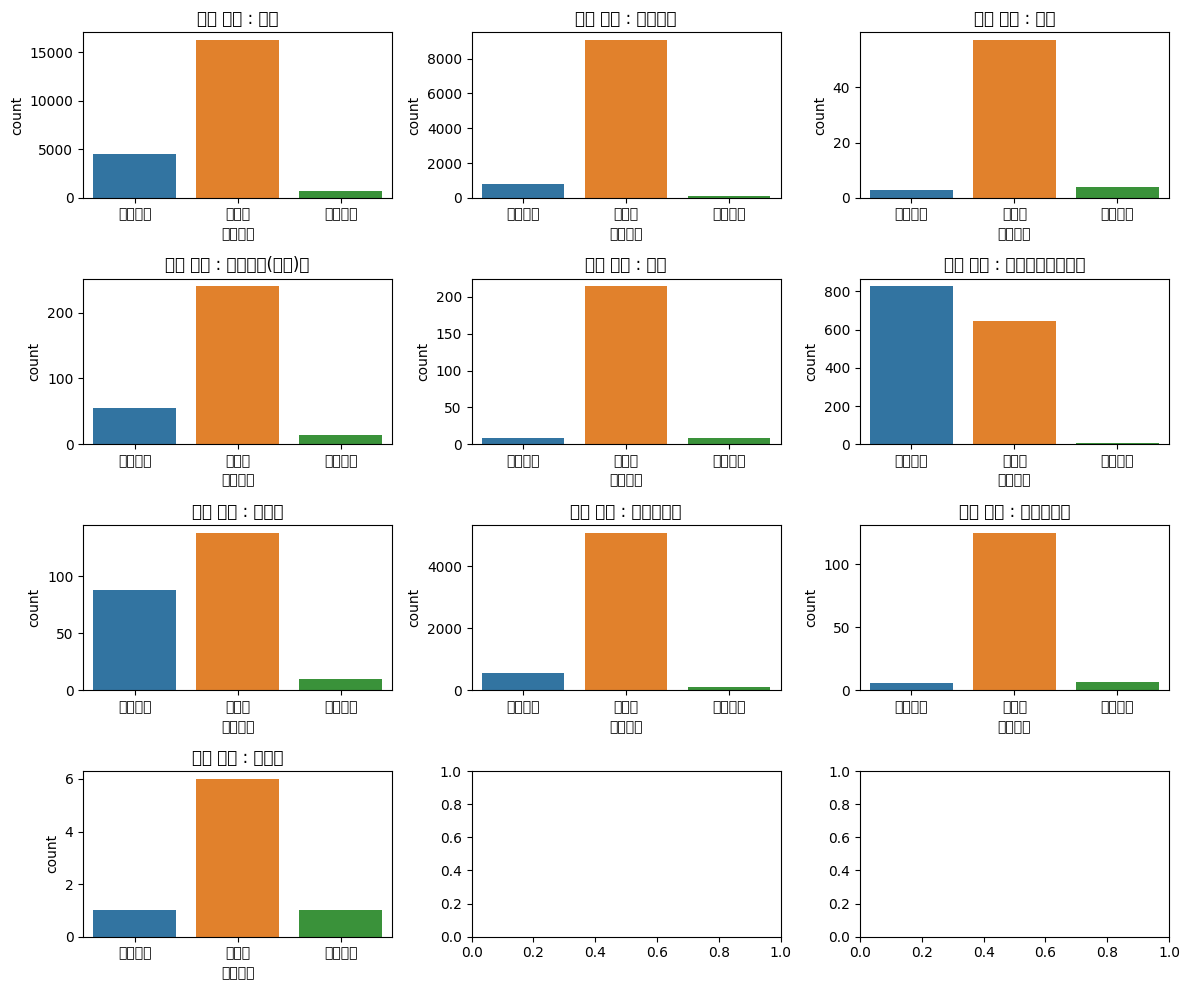

In [276]:
fig, axes = plt.subplots(4,3, figsize=(12,10))

x_order = tr_df['사고유형'].unique()

for (ax,k) in zip(axes.flatten(),tr_df['도로형태2'].unique()):
    sns.countplot(x='사고유형',data=tr_df[tr_df['도로형태2']==k],ax=ax,order=x_order)
    ax.set_title(f'도로 형태 : {k}')

plt.tight_layout()
plt.show()

In [277]:
tr_df[tr_df['피해운전자 상해정도'].isnull() & tr_df['피해운전자 연령'].isnull()  & tr_df['피해운전자 성별'].isnull()  & tr_df['피해운전자 차종'].isnull()]['사고유형'].value_counts()

차량단독    991
Name: 사고유형, dtype: int64

In [278]:
tr_df['피해운전자 상해정도'].fillna(tr_df['가해운전자 상해정도'],inplace=True)
tr_df['피해운전자 연령'].fillna(tr_df['가해운전자 연령'],inplace=True)
tr_df['피해운전자 성별'].fillna(tr_df['가해운전자 성별'],inplace=True)
tr_df['피해운전자 차종'].fillna(tr_df['가해운전자 차종'],inplace=True)

In [279]:
tr_df.isnull().sum().sort_values()

요일             0
보안등 설치개수       0
도로형태2          0
도로형태1          0
동              0
구              0
시간             0
일              0
월              0
연              0
ECLO           0
부상자수           0
경상자수           0
중상자수           0
사망자수           0
피해운전자 상해정도     0
피해운전자 연령       0
피해운전자 성별       0
피해운전자 차종       0
가해운전자 상해정도     0
가해운전자 연령       0
가해운전자 성별       0
가해운전자 차종       0
법규위반           0
사고유형 - 세부분류    0
사고유형           0
노면상태           0
기상상태           0
CCTV설치대수       0
제한속도           0
dtype: int64

In [280]:
tr_df.shape

(39609, 30)

### 시각화

In [281]:
tr_df.columns

Index(['요일', '기상상태', '노면상태', '사고유형', '사고유형 - 세부분류', '법규위반', '가해운전자 차종',
       '가해운전자 성별', '가해운전자 연령', '가해운전자 상해정도', '피해운전자 차종', '피해운전자 성별',
       '피해운전자 연령', '피해운전자 상해정도', '사망자수', '중상자수', '경상자수', '부상자수', 'ECLO', '연',
       '월', '일', '시간', '구', '동', '도로형태1', '도로형태2', '보안등 설치개수', 'CCTV설치대수',
       '제한속도'],
      dtype='object')

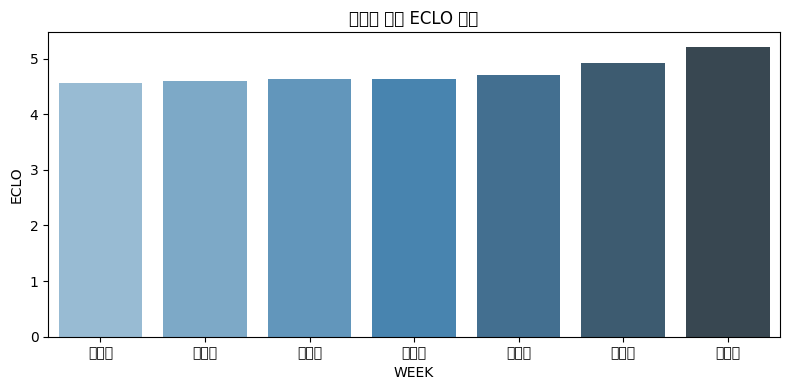

In [282]:
# 요일에 따른 ECLO 변화
day_ECLO = tr_df.groupby('요일')['ECLO'].mean().sort_values()

plt.figure(figsize=(8,4))
plt.title("요일에 따른 ECLO 변화")
pal = sns.color_palette("Blues_d", len(day_ECLO))

sns.barplot(x=day_ECLO.index, y=day_ECLO.values, palette=pal)

plt.xlabel("WEEK")
plt.ylabel("ECLO")
plt.tight_layout()

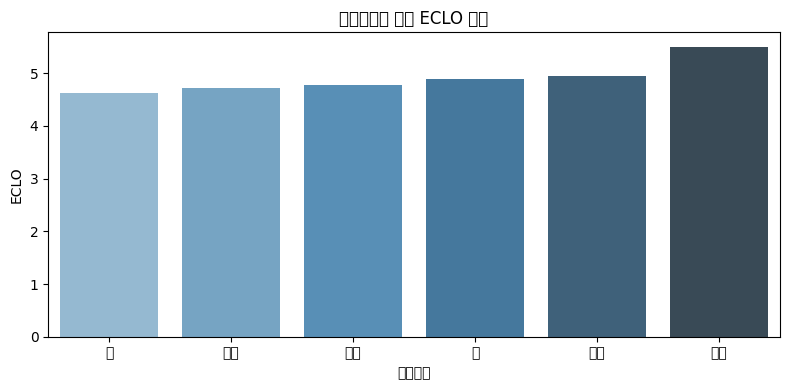

In [283]:
# 기상상태에 따른 ECLO 변화
day_ECLO = tr_df.groupby('기상상태')['ECLO'].mean().sort_values()

plt.figure(figsize=(8,4))
plt.title("기상상태에 따른 ECLO 변화")
pal = sns.color_palette("Blues_d", len(day_ECLO))

sns.barplot(x=day_ECLO.index, y=day_ECLO.values, palette=pal)

plt.xlabel("기상상태")
plt.ylabel("ECLO")
plt.tight_layout()

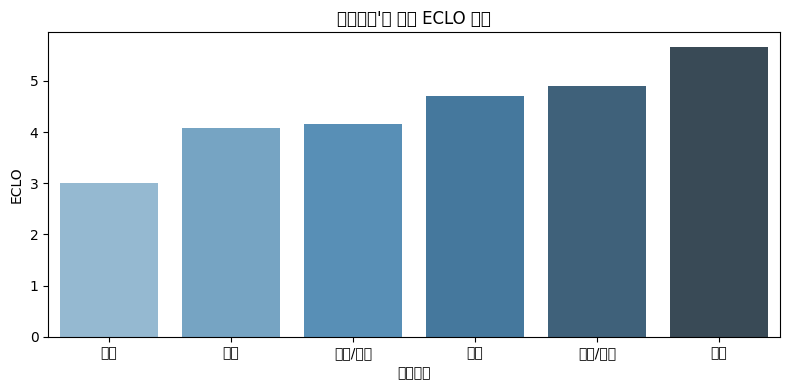

In [284]:
# 노면상태'에 따른 ECLO 변화
day_ECLO = tr_df.groupby('노면상태')['ECLO'].mean().sort_values()

plt.figure(figsize=(8,4))
plt.title("노면상태'에 따른 ECLO 변화")
pal = sns.color_palette("Blues_d", len(day_ECLO))

sns.barplot(x=day_ECLO.index, y=day_ECLO.values, palette=pal)

plt.xlabel("노면상태")
plt.ylabel("ECLO")
plt.tight_layout()

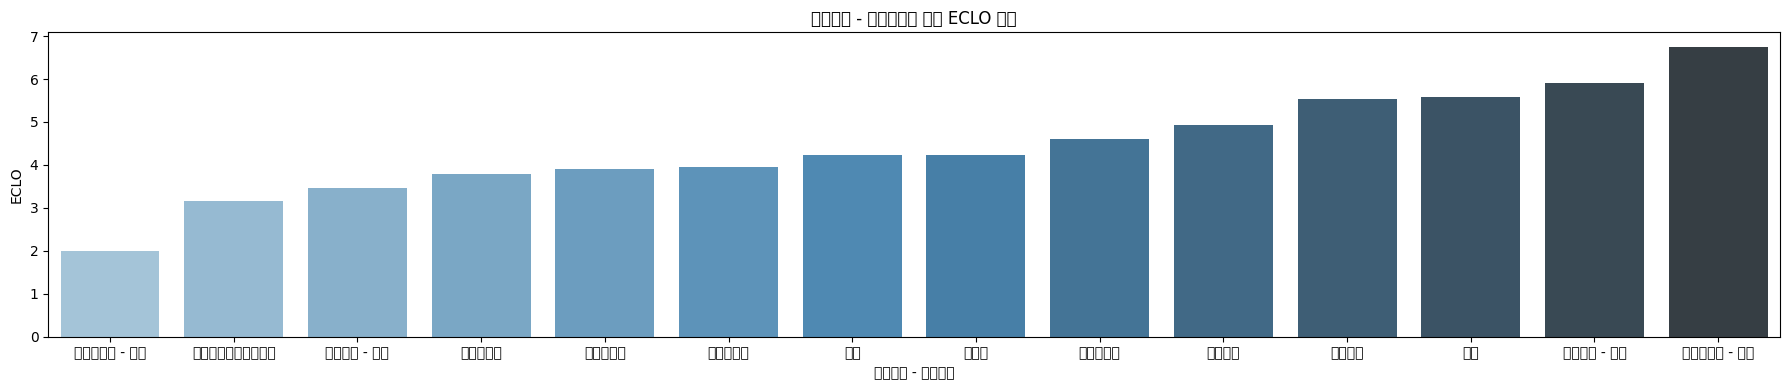

In [285]:
# 사고유형 - 세부분류에 따른 ECLO 변화
day_ECLO = tr_df.groupby('사고유형 - 세부분류')['ECLO'].mean().sort_values()

plt.figure(figsize=(18,4))
plt.title("사고유형 - 세부분류에 따른 ECLO 변화")
pal = sns.color_palette("Blues_d", len(day_ECLO))

sns.barplot(x=day_ECLO.index, y=day_ECLO.values, palette=pal)

plt.xlabel("사고유형 - 세부분류")
plt.ylabel("ECLO")
plt.tight_layout()

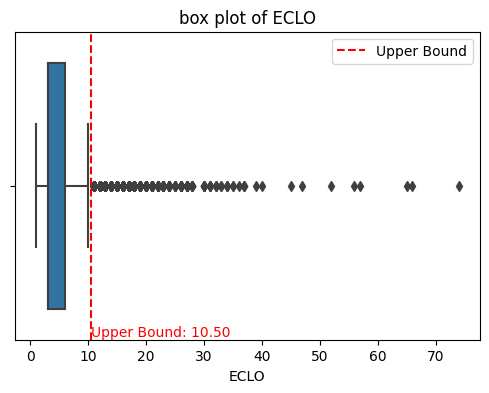

In [286]:
Q1 = tr_df['ECLO'].quantile(0.25)
Q3 = tr_df['ECLO'].quantile(0.75)
IQR = Q3-Q1

upper_bound = Q3 + 1.5 * IQR



plt.figure(figsize=(6,4))
sns.boxplot(x='ECLO', data=tr_df)

plt.axvline(x=upper_bound, color='r', linestyle='--', label='Upper Bound')

plt.text(upper_bound+12, 0.5, f'Upper Bound: {upper_bound:.2f}', color='r', ha='center', va='bottom')

plt.legend()

plt.title("box plot of ECLO")
plt.show()

In [287]:
high_ECLO_df = tr_df[tr_df['ECLO'] > 10.5]
no_high_ECLO_df = tr_df[tr_df['ECLO'] <= 10.5]

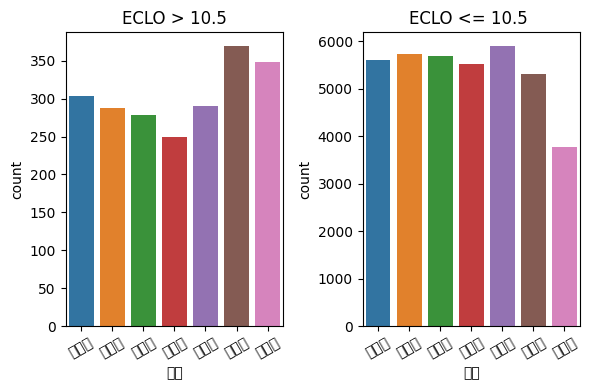

In [288]:
# ECLO 10.5 이상은 주말 발생 비율이 높다, 10.5 이하는 주말 사고 발생 비율이 더 낮다.

x_order = ['월요일', '화요일', '수요일', '목요일', '금요일', '토요일', '일요일']

fig, axes = plt.subplots(1, 2, figsize=(6,4))
sns.countplot(x='요일', data=high_ECLO_df, order=x_order, ax=axes[0])
sns.countplot(x='요일', data=no_high_ECLO_df, order=x_order, ax=axes[1])
axes[0].tick_params(axis='x', rotation=30)
axes[1].tick_params(axis='x', rotation=30)

axes[0].set_title("ECLO > 10.5")
axes[1].set_title("ECLO <= 10.5 ")

plt.tight_layout()
plt.show()

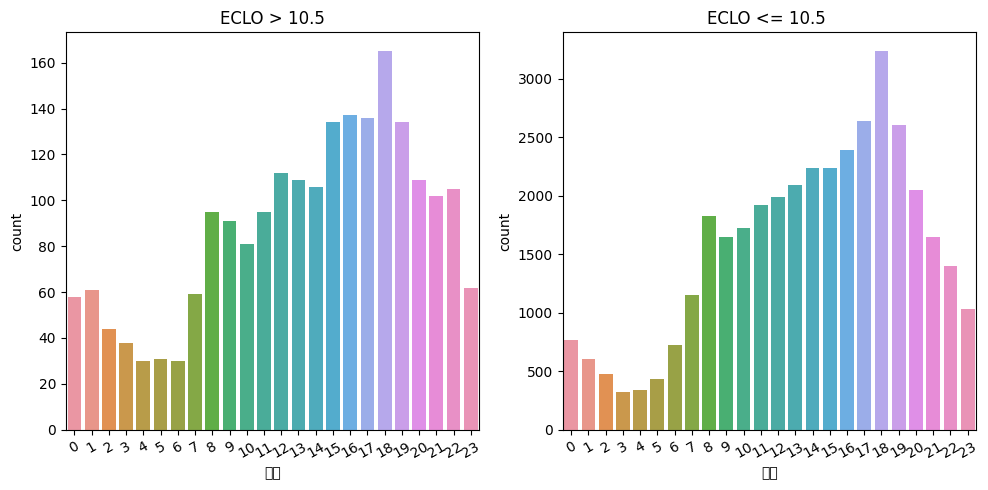

In [289]:
fig, axes = plt.subplots(1, 2, figsize=(10,5))
sns.countplot(x='시간', data=high_ECLO_df,  ax=axes[0])
sns.countplot(x='시간', data=no_high_ECLO_df,  ax=axes[1])
axes[0].tick_params(axis='x', rotation=30)
axes[1].tick_params(axis='x', rotation=30)

axes[0].set_title("ECLO > 10.5")
axes[1].set_title("ECLO <= 10.5 ")

plt.tight_layout()
plt.show()

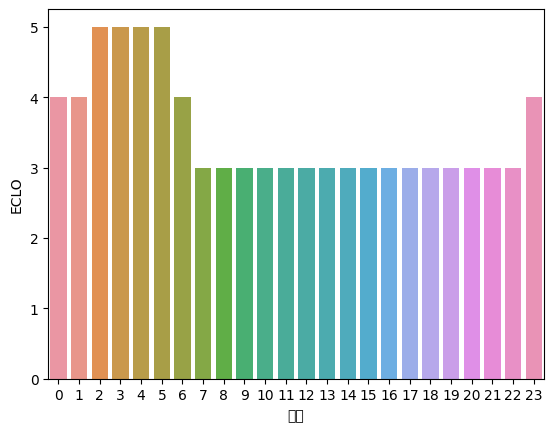

In [290]:
# 사고 발생 시간대별 ECLO median

sns.barplot(x='시간', y='ECLO', data=train_df, estimator=np.median, errorbar=None)
plt.show()

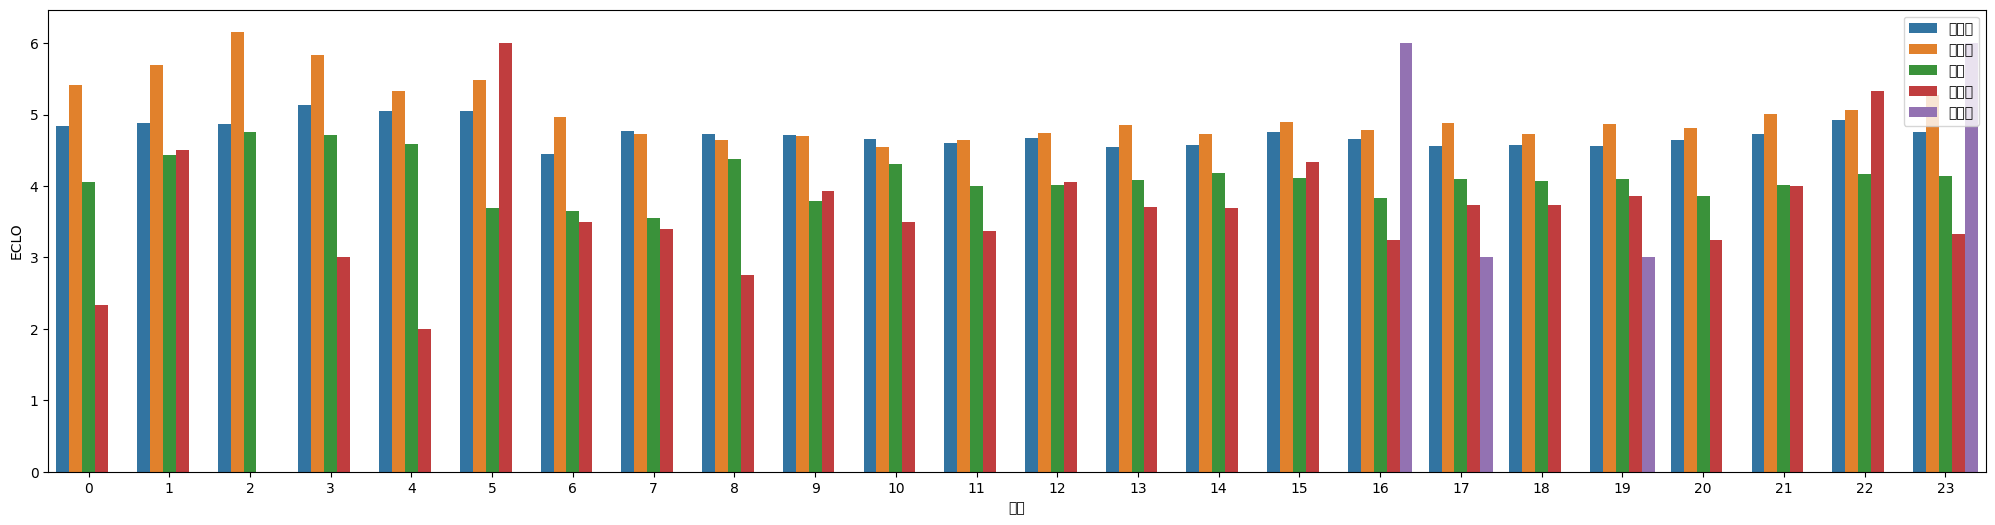

In [291]:
# 시간 / 사고형태 / 도로형태1
plt.figure(figsize=(25, 6))
sns.barplot(x='시간', y='ECLO', hue='도로형태1', data=tr_df, errorbar=None)
plt.legend(loc='upper right')
plt.show()

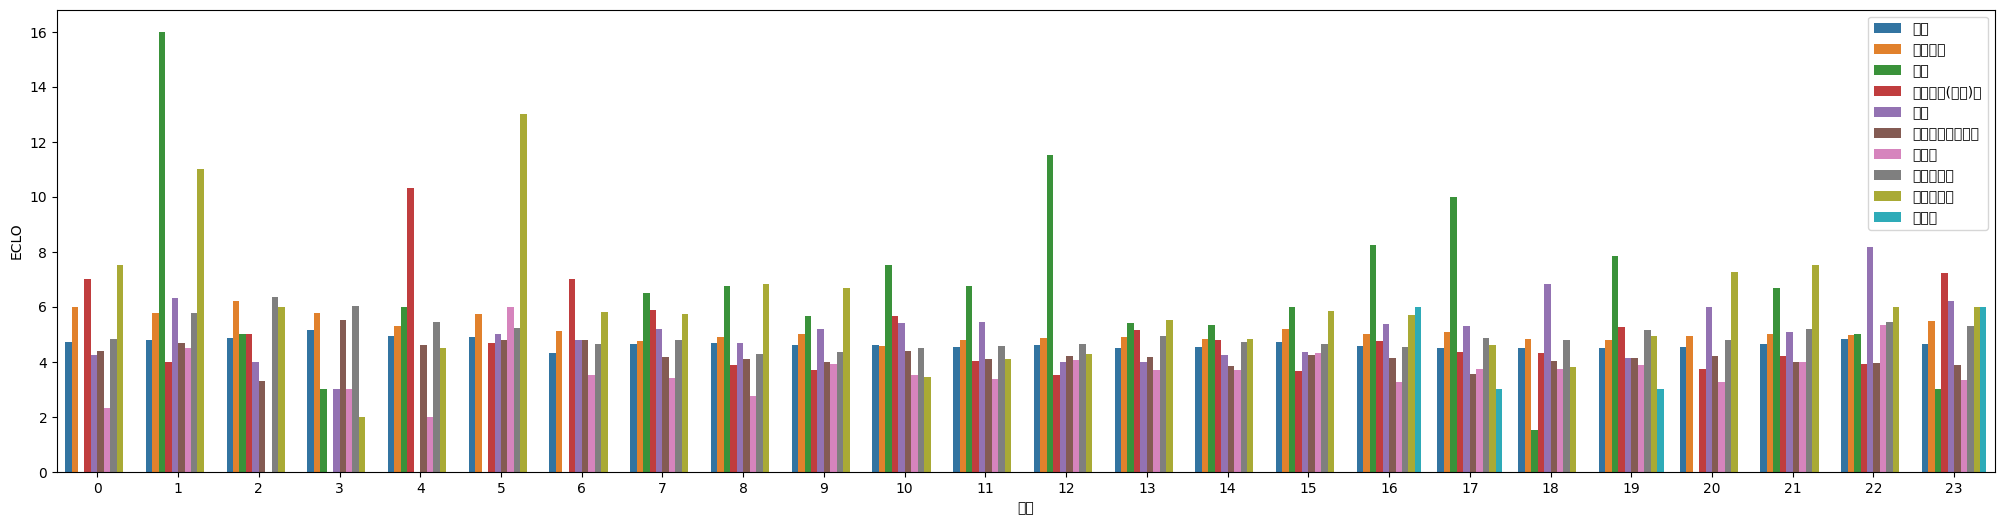

In [292]:
# 시간 / 사고형태 / 도로형태2
plt.figure(figsize=(25, 6))
sns.barplot(x='시간', y='ECLO', hue='도로형태2', data=tr_df, errorbar=None)
plt.legend(loc='upper right')
plt.show()

In [293]:
tr_df.groupby(['도로형태1','도로형태2'])[['ECLO']].mean()

ECLO
도로형태1 도로형태2              
교차로   교차로부근      4.863035
      교차로안       5.006142
      교차로횡단보도내   4.122795
기타    기타         4.065962
단일로   고가도로위      5.615942
      교량         5.211207
      기타         4.653990
      지하차도(도로)내  4.576052
      터널         6.578125
미분류   미분류        3.750000
주차장   주차장        3.716102

In [294]:
# 도로형태2가 도로형태1의 내용을 포함하고 있음으로 제거함
tr_df.drop(['도로형태1'],axis=1,inplace=True)
tr_df.rename(columns={'도로형태2':'도로형태'},inplace=True)
tr_df.columns

Index(['요일', '기상상태', '노면상태', '사고유형', '사고유형 - 세부분류', '법규위반', '가해운전자 차종',
       '가해운전자 성별', '가해운전자 연령', '가해운전자 상해정도', '피해운전자 차종', '피해운전자 성별',
       '피해운전자 연령', '피해운전자 상해정도', '사망자수', '중상자수', '경상자수', '부상자수', 'ECLO', '연',
       '월', '일', '시간', '구', '동', '도로형태', '보안등 설치개수', 'CCTV설치대수', '제한속도'],
      dtype='object')

In [295]:
col_name = {'요일':'week','기상상태':'weather','노면상태':'surface','사고유형':'how_accident','사고유형 - 세부분류':'accident_detail','법규위반':'nolaw',
                        '가해운전자 차종':'perpetrator_car','가해운전자 성별':'perpetrator_sex','가해운전자 연령':'perpetrator_age','가해운전자 상해정도':'perpetrator_injury','피해운전자 차종':'victim_car',
                        '피해운전자 성별':'victim_sex','피해운전자 연령':'victim_age','피해운전자 상해정도':'victim_injury','사망자수':'dead','중상자수':'seriously_injured','경상자수':'minor_casualty','부상자수':'injured',
                        '연':'year','월':'month','일':'day','시간':'hour','구':'gu','동':'dong','도로형태':'road','보안등 설치개수':'light','CCTV설치대수':'CCTV','제한속도':'limitspeed'}

In [296]:
tr_df.rename(columns=col_name,inplace=True)
tr_df.columns

Index(['week', 'weather', 'surface', 'how_accident', 'accident_detail',
       'nolaw', 'perpetrator_car', 'perpetrator_sex', 'perpetrator_age',
       'perpetrator_injury', 'victim_car', 'victim_sex', 'victim_age',
       'victim_injury', 'dead', 'seriously_injured', 'minor_casualty',
       'injured', 'ECLO', 'year', 'month', 'day', 'hour', 'gu', 'dong', 'road',
       'light', 'CCTV', 'limitspeed'],
      dtype='object')

In [297]:
tr_df['accident_detail'].value_counts()

측면충돌          17104
기타            10630
추돌             5885
횡단중            2443
정면충돌            837
차도통행중           616
후진중충돌           613
보도통행중           524
길가장자리구역통행중      467
공작물충돌           324
전도전복 - 전도       144
전도전복 - 전복        10
도로외이탈 - 추락        8
도로외이탈 - 기타        4
Name: accident_detail, dtype: int64

<Axes: xlabel='accident_detail', ylabel='ECLO'>

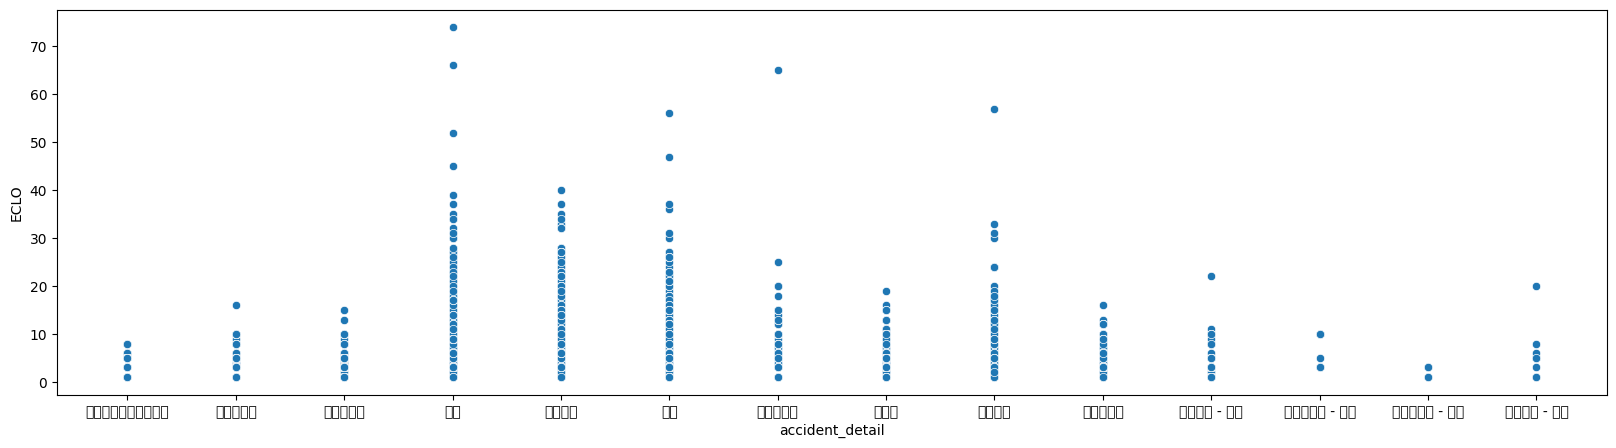

In [298]:
plt.figure(figsize=(20,5))
sns.scatterplot(data = tr_df, x = 'accident_detail', y = 'ECLO')

<Axes: xlabel='light', ylabel='ECLO'>

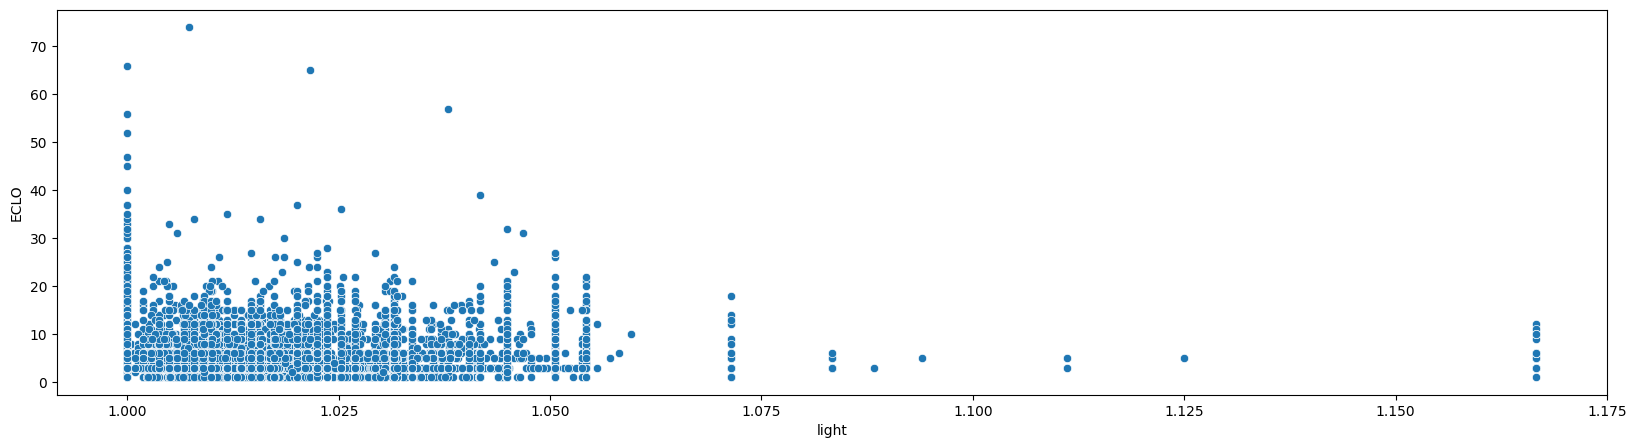

In [299]:
plt.figure(figsize=(20,5))
sns.scatterplot(data = tr_df, x = 'light', y = 'ECLO')

## test

In [300]:
te_df.isnull().sum()

요일             0
기상상태           0
노면상태           0
사고유형           0
연              0
월              0
일              0
시간             0
구              0
동              0
도로형태1          0
도로형태2          0
설치개수        3999
CCTV설치대수    8550
제한속도         729
dtype: int64

In [301]:
te_df.rename(columns={'설치개수':'보안등 설치개수'},inplace=True)

In [302]:
te_df['CCTV설치대수'] = te_df['CCTV설치대수'].fillna(te_df['CCTV설치대수'].mean())
te_df['보안등 설치개수'] = te_df['보안등 설치개수'].interpolate()
te_df['제한속도'] = te_df['제한속도'].interpolate()

In [303]:
te_df.isnull().sum()

요일          0
기상상태        0
노면상태        0
사고유형        0
연           0
월           0
일           0
시간          0
구           0
동           0
도로형태1       0
도로형태2       0
보안등 설치개수    0
CCTV설치대수    0
제한속도        0
dtype: int64

In [304]:
# 도로형태2가 도로형태1의 내용을 포함하고 있음으로 제거함
te_df.drop(['도로형태1'],axis=1,inplace=True)
te_df.rename(columns={'도로형태2':'도로형태'},inplace=True)
te_df.columns

Index(['요일', '기상상태', '노면상태', '사고유형', '연', '월', '일', '시간', '구', '동', '도로형태',
       '보안등 설치개수', 'CCTV설치대수', '제한속도'],
      dtype='object')

In [305]:
col_name = {'요일':'week','기상상태':'weather','노면상태':'surface','사고유형':'how_accident',
                     '연':'year','월':'month','일':'day','시간':'hour','구':'gu','동':'dong','도로형태':'road','보안등 설치개수':'light','CCTV설치대수':'CCTV','제한속도':'limitspeed'}

In [306]:
te_df.rename(columns=col_name,inplace=True)
te_df.columns

Index(['week', 'weather', 'surface', 'how_accident', 'year', 'month', 'day',
       'hour', 'gu', 'dong', 'road', 'light', 'CCTV', 'limitspeed'],
      dtype='object')

# 인코딩

In [307]:
pip install category_encoders

In [308]:
from sklearn.preprocessing import LabelEncoder
from category_encoders.target_encoder import TargetEncoder

In [309]:
te_df.columns
#카테고리 열이 아니면 그래프 그려서 분포 확인해보기

Index(['week', 'weather', 'surface', 'how_accident', 'year', 'month', 'day',
       'hour', 'gu', 'dong', 'road', 'light', 'CCTV', 'limitspeed'],
      dtype='object')

In [310]:
train_x = tr_df[te_df.columns].copy()
train_y = tr_df['ECLO'].copy()

In [311]:
categorical_features = list(train_x.dtypes[train_x.dtypes == "object"].index)
categorical_features

['week', 'weather', 'surface', 'how_accident', 'gu', 'dong', 'road']

In [312]:
categorical_features_test = list(te_df.dtypes[te_df.dtypes == "object"].index)
categorical_features_test

['week', 'weather', 'surface', 'how_accident', 'gu', 'dong', 'road']

In [313]:
numeric_features_test = list(te_df.dtypes[te_df.dtypes == "int"].index)
numeric_features_test.extend(list(te_df.dtypes[te_df.dtypes == "float"].index))

In [314]:
numeric_features_test

['year', 'month', 'day', 'hour', 'light', 'CCTV', 'limitspeed']

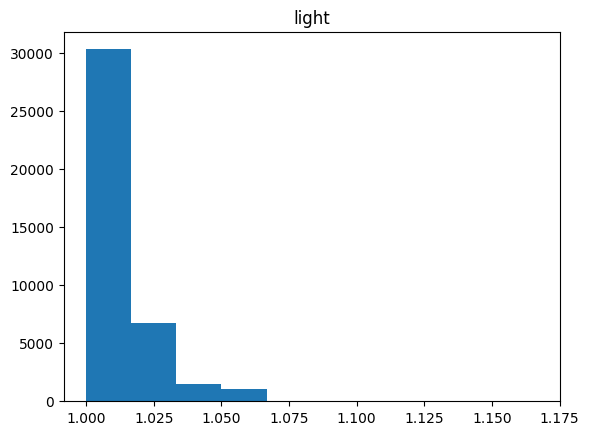

In [315]:
plt.hist(train_x['light'])
plt.title('light')
plt.show()

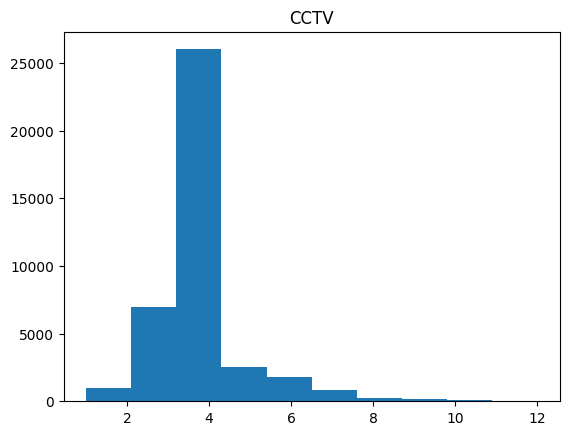

In [316]:
plt.hist(train_x['CCTV'])
plt.title('CCTV')
plt.show()

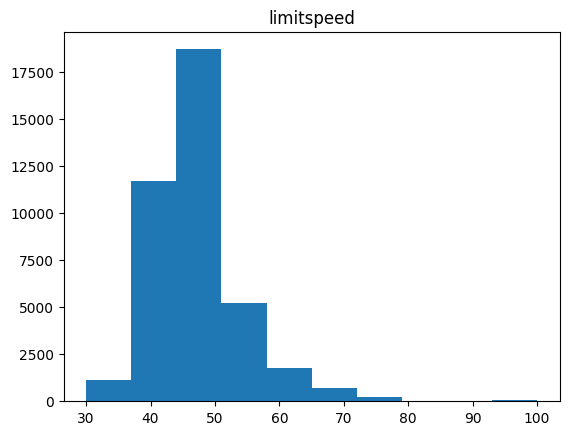

In [317]:
plt.hist(train_x['limitspeed'])
plt.title('limitspeed')
plt.show()

In [318]:
train_x[train_x['limitspeed'] == train_x['limitspeed'].max()].head()

,week,weather,surface,how_accident,year,month,day,hour,gu,dong,road,light,CCTV,limitspeed
317,금요일,맑음,건조,차대차,2019,1,11,8,동구,율암동,기타,1.010870,2.837607,100.0
1823,월요일,맑음,건조,차대차,2019,2,25,9,동구,도동,기타,1.009709,3.923077,100.0
2119,월요일,맑음,건조,차대차,2019,3,4,20,동구,율암동,교차로부근,1.010870,3.374205,100.0
2685,화요일,맑음,건조,차대차,2019,3,19,12,동구,도동,기타,1.009709,3.846154,100.0
4089,월요일,기타,건조,차대사람,2019,4,22,18,동구,율암동,기타,1.010870,3.551186,100.0


In [319]:
train_x['light'].describe()

count    39609.000000
mean         1.008551
std          0.014053
min          1.000000
25%          1.000000
50%          1.000000
75%          1.015737
max          1.166667
Name: light, dtype: float64

In [320]:
te_df['light'].describe()

count    10963.000000
mean         1.008669
std          0.014224
min          1.000000
25%          1.000000
50%          1.000000
75%          1.015737
max          1.166667
Name: light, dtype: float64

In [321]:
def change_range(x):
  if x > train_x['light'].mean():
    return 1
  else:
    return 0

In [322]:
train_x['light_range'] = train_x['light'].apply(change_range)

In [323]:
train_x['light_range'].value_counts()

0    26526
1    13083
Name: light_range, dtype: int64

In [324]:
def change_range_test(x):
  if x > te_df['light'].mean():
    return 1
  else:
    return 0

In [325]:
te_df['light_range'] = te_df['light'].apply(change_range_test)
te_df['light_range'].value_counts()

0    7293
1    3670
Name: light_range, dtype: int64

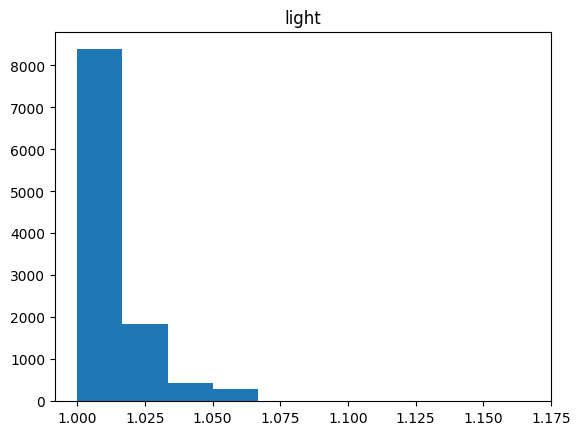

In [326]:
plt.hist(te_df['light'])
plt.title('light')
plt.show()

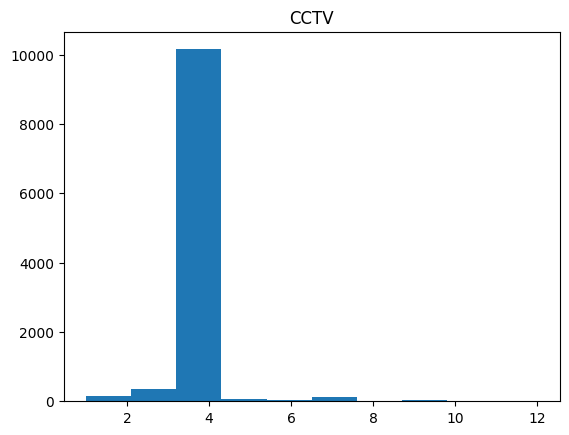

In [327]:
plt.hist(te_df['CCTV'])
plt.title('CCTV')
plt.show()

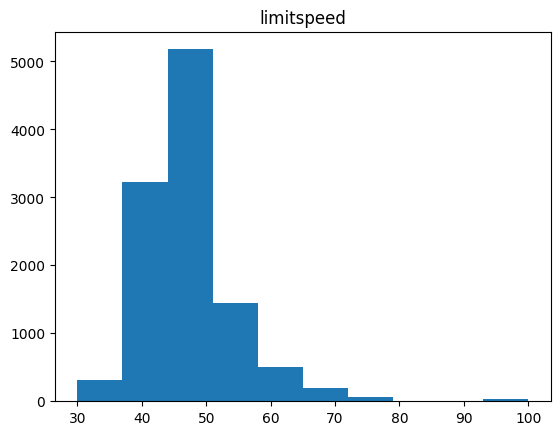

In [328]:
plt.hist(te_df['limitspeed'])
plt.title('limitspeed')
plt.show()

In [329]:
#for i in categorical_features:
#    le = TargetEncoder(cols=[i])
#    train_x[i] = le.fit_transform(train_x[i], train_y)
#    te_df[i] = le.transform(te_df[i])

#display(train_x.head())
#display(te_df.head())

In [330]:
categorical_features

['week', 'weather', 'surface', 'how_accident', 'gu', 'dong', 'road']

In [331]:
# Mean target encoding
Week_mean_target_encoded = tr_df.groupby('week')['ECLO'].mean()
Weather_mean_target_encoded = tr_df.groupby('weather')['ECLO'].mean()
Surface_mean_target_encoded = tr_df.groupby('surface')['ECLO'].mean()
How_accident_mean_target_encoded = tr_df.groupby('how_accident')['ECLO'].mean()
Gu_mean_target_encoded = tr_df.groupby('gu')['ECLO'].mean()
Dong_mean_target_encoded = tr_df.groupby('dong')['ECLO'].mean()
Road_mean_target_encoded = tr_df.groupby('road')['ECLO'].mean()

In [332]:
train_x['week_encoded']=train_x['week'].map(Week_mean_target_encoded)
train_x['weather_encoded']=train_x['weather'].map(Weather_mean_target_encoded)
train_x['surface_encoded']=train_x['surface'].map(Surface_mean_target_encoded)
train_x['how_accident_encoded']=train_x['how_accident'].map(How_accident_mean_target_encoded)
train_x['gu_encoded']=train_x['gu'].map(Gu_mean_target_encoded)
train_x['dong_encoded']=train_x['dong'].map(Dong_mean_target_encoded)
train_x['road_encoded']=train_x['road'].map(Road_mean_target_encoded)

In [333]:
train_x['weather'].value_counts()

맑음    36181
비      2627
흐림      729
기타       56
안개        8
눈         8
Name: weather, dtype: int64

In [334]:
train_x['surface'].value_counts()

건조       36420
젖음/습기     3100
기타          58
서리/결빙       25
침수           3
적설           3
Name: surface, dtype: int64

In [335]:
train_x['how_accident'].value_counts()

차대차     31785
차대사람     6833
차량단독      991
Name: how_accident, dtype: int64

In [336]:
train_x['gu'].value_counts()

달서구    9891
수성구    6707
북구     6650
동구     5341
서구     3495
달성군    2767
남구     2559
중구     2199
Name: gu, dtype: int64

In [337]:
train_x['dong'].value_counts()

대명동      1749
범어동      1173
상인동      1143
비산동       968
내당동       938
         ... 
완전동         2
신용동         2
동성로1가       2
도남동         2
평광동         1
Name: dong, Length: 196, dtype: int64

In [338]:
train_x['road'].value_counts()

기타           21471
교차로안          9931
교차로부근         5746
교차로횡단보도내      1474
지하차도(도로)내      309
주차장            236
교량             232
고가도로위          138
터널              64
미분류              8
Name: road, dtype: int64

In [339]:
categorical_features_test

['week', 'weather', 'surface', 'how_accident', 'gu', 'dong', 'road']

In [340]:
numeric_features_test

['year', 'month', 'day', 'hour', 'light', 'CCTV', 'limitspeed']

In [341]:
te_df['week_encoded']=te_df['week'].map(Week_mean_target_encoded)
te_df['weather_encoded']=te_df['weather'].map(Weather_mean_target_encoded)
te_df['surface_encoded']=te_df['surface'].map(Surface_mean_target_encoded)
te_df['how_accident_encoded']=te_df['how_accident'].map(How_accident_mean_target_encoded)
te_df['gu_encoded']=te_df['gu'].map(Gu_mean_target_encoded)
te_df['dong_encoded']=te_df['dong'].map(Dong_mean_target_encoded)
te_df['road_encoded']=te_df['road'].map(Road_mean_target_encoded)

데이터 불균형 해소 필요해 보임!(train에만 적용)
- SMOTE 이용

In [342]:
display(train_x.columns)
display(te_df.columns)

Index(['week', 'weather', 'surface', 'how_accident', 'year', 'month', 'day',
       'hour', 'gu', 'dong', 'road', 'light', 'CCTV', 'limitspeed',
       'light_range', 'week_encoded', 'weather_encoded', 'surface_encoded',
       'how_accident_encoded', 'gu_encoded', 'dong_encoded', 'road_encoded'],
      dtype='object')

Index(['week', 'weather', 'surface', 'how_accident', 'year', 'month', 'day',
       'hour', 'gu', 'dong', 'road', 'light', 'CCTV', 'limitspeed',
       'light_range', 'week_encoded', 'weather_encoded', 'surface_encoded',
       'how_accident_encoded', 'gu_encoded', 'dong_encoded', 'road_encoded'],
      dtype='object')

In [343]:
train_df.corr()

,사망자수,중상자수,경상자수,부상자수,ECLO,연,월,일,시간
사망자수,1.000000,-0.004368,-0.060607,-0.022771,0.218507,-0.003189,-0.001562,-0.001296,-0.037692
중상자수,-0.004368,1.000000,-0.325585,-0.105167,0.464520,-0.035885,-0.013565,-0.000712,-0.038748
경상자수,-0.060607,-0.325585,1.000000,-0.165157,0.636370,0.000510,0.003465,-0.012349,0.024487
부상자수,-0.022771,-0.105167,-0.165157,1.000000,-0.118713,-0.023072,0.007676,0.000619,0.006234
ECLO,0.218507,0.464520,0.636370,-0.118713,1.000000,-0.031281,-0.006871,-0.012303,-0.017355
연,-0.003189,-0.035885,0.000510,-0.023072,-0.031281,1.000000,-0.018267,-0.012228,0.012290
월,-0.001562,-0.013565,0.003465,0.007676,-0.006871,-0.018267,1.000000,0.008078,-0.006122
일,-0.001296,-0.000712,-0.012349,0.000619,-0.012303,-0.012228,0.008078,1.000000,0.003374
시간,-0.037692,-0.038748,0.024487,0.006234,-0.017355,0.012290,-0.006122,0.003374,1.000000


(array([3.5346e+04, 3.7660e+03, 3.9300e+02, 7.6000e+01, 1.8000e+01,
        2.0000e+00, 3.0000e+00, 2.0000e+00, 2.0000e+00, 1.0000e+00]),
 array([ 1. ,  8.3, 15.6, 22.9, 30.2, 37.5, 44.8, 52.1, 59.4, 66.7, 74. ]),
 <BarContainer object of 10 artists>)

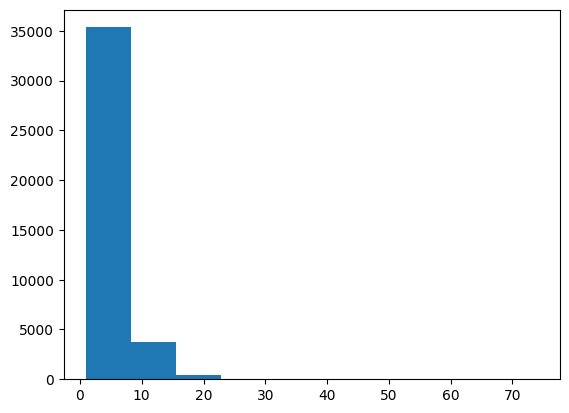

In [344]:
plt.hist(train_y)

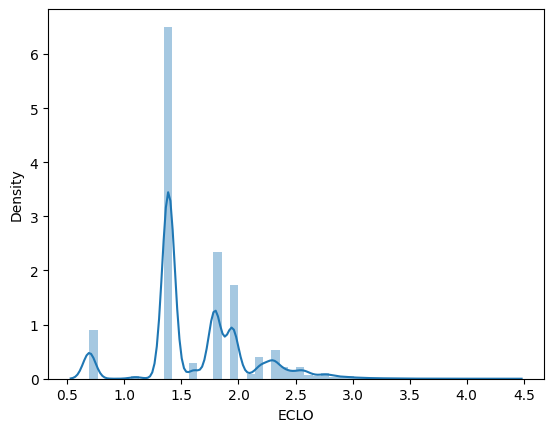

In [345]:
train_y_log = np.log1p(train_y)
sns.distplot(train_y_log)
plt.show()

# 모델링

In [346]:
train_x_new = train_x[['week_encoded', 'weather_encoded', 'surface_encoded',
       'how_accident_encoded', 'gu_encoded', 'dong_encoded', 'road_encoded','year', 'month', 'day','hour','CCTV', 'limitspeed',
       'light_range']]

In [347]:
te_df_new = te_df[['week_encoded', 'weather_encoded', 'surface_encoded',
       'how_accident_encoded', 'gu_encoded', 'dong_encoded', 'road_encoded','year', 'month', 'day','hour','CCTV', 'limitspeed',
       'light_range']]

In [348]:
# 에러나서 보류
#from imblearn.over_sampling import SMOTE
#smote = SMOTE()
#train_X_over, train_Y_over = smote.fit_resample(train_x_new,train_y)

파이토치를 이용해 모델 구현

In [350]:
#from sklearn.model_selection import GridsearchCV
#from sklearn.linear_model import LinearRegreesion,Lasso,Ridge
#from sklearn.metrics import mean_squared_error, mean_absolute_error

In [383]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

normed_train_data = pd.DataFrame(scaler.fit_transform(train_x_new),columns=train_x_new.columns)
normed_test_data = pd.DataFrame(scaler.fit_transform(te_df_new),columns=te_df_new.columns)

In [ ]:
'''
def rmse(y,pred):
  rmse = np.sqrt(mean_squared_error(y,pred))
  return rmse

def rmsle(y,pred):
  log_y = np.log1p(y)
  log_pred = np.log1p(pred)
  squared_error = (log_y - log_pred)**2
  rmsle = np.sqrt(np.mean(squared_error))
  return rmsle

def eval_reg(y,pred):
  rmse_val = rmse(y,pred)
  rmsle_val = rmsle(y,pred)
  mae = mean_absolute_error(y,pred)
  print('RMSLE : {0:3f} RMSE : {2:3f} MAE : {2:3f}',format(rmsle_val,rmse_val,mae))
'''

In [354]:
import tensorflow as tf

In [386]:
def rmsle(y_true, y_pred):
    y_true = tf.cast(y_true, tf.float32)
    y_pred = tf.cast(y_pred, tf.float32)

    squared_error = tf.square(tf.math.log1p(y_pred) - tf.math.log1p(y_true))

    return tf.sqrt(tf.reduce_mean(squared_error))

def loss_fn(y_true, y_pred):
    return rmsle(y_true, y_pred)

def metric_fn(y_true, y_pred):
    return rmsle(y_true, y_pred)

In [387]:
callbacks_list = [
    tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=30, verbose=2, mode='min',restore_best_weights=True),
    tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.8, patience=3, min_lr=0.00001),
    tf.keras.callbacks.TerminateOnNaN()
]

In [388]:
def create_model():

    input_layer = tf.keras.Input(shape=(len(normed_train_data.columns), ))
    x = tf.keras.layers.BatchNormalization(epsilon=0.00001)(input_layer)
    x = tf.keras.layers.Dense(16, activation='relu')(x)
    #x = tf.keras.layers.BatchNormalization(epsilon=0.00001)(x)
    x = tf.keras.layers.Dense(32, activation='relu')(x)
    #x = tf.keras.layers.BatchNormalization(epsilon=0.00001)(x)
    output_layer = tf.keras.layers.Dense(1)(x)

    model = tf.keras.Model(inputs=input_layer, outputs=output_layer)

    model.compile(optimizer=tf.keras.optimizers.Adam(0.001),
                  loss=loss_fn,
                  metrics=[metric_fn]
                  )

    return model

model = create_model()
history = model.fit(normed_train_data.astype('float32'), train_y_log.astype('float32'), #type 맞춰줘야함!!!!
                    epochs=100,
                    callbacks=callbacks_list,
                    validation_split=0.1)

Epoch 1/100
1114/1114 [==============================] - 4s 3ms/step - loss: 0.2100 - metric_fn: 0.2100 - val_loss: 0.1716 - val_metric_fn: 0.1715 - lr: 0.0010
Epoch 2/100
1114/1114 [==============================] - 3s 3ms/step - loss: 0.1723 - metric_fn: 0.1723 - val_loss: 0.1641 - val_metric_fn: 0.1641 - lr: 0.0010
Epoch 3/100
1114/1114 [==============================] - 3s 3ms/step - loss: 0.1710 - metric_fn: 0.1710 - val_loss: 0.1623 - val_metric_fn: 0.1623 - lr: 0.0010
Epoch 4/100
1114/1114 [==============================] - 5s 4ms/step - loss: 0.1704 - metric_fn: 0.1704 - val_loss: 0.1618 - val_metric_fn: 0.1618 - lr: 0.0010
Epoch 5/100
1114/1114 [==============================] - 3s 3ms/step - loss: 0.1700 - metric_fn: 0.1700 - val_loss: 0.1619 - val_metric_fn: 0.1619 - lr: 0.0010
Epoch 6/100
1114/1114 [==============================] - 3s 3ms/step - loss: 0.1697 - metric_fn: 0.1697 - val_loss: 0.1625 - val_metric_fn: 0.1625 - lr: 0.0010
Epoch 7/100
1114/1114 [=================

In [381]:
# 이미 float64형
normed_train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39609 entries, 0 to 39608
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   week_encoded          39609 non-null  float64
 1   weather_encoded       39609 non-null  float64
 2   surface_encoded       39609 non-null  float64
 3   how_accident_encoded  39609 non-null  float64
 4   gu_encoded            39609 non-null  float64
 5   dong_encoded          39609 non-null  float64
 6   road_encoded          39609 non-null  float64
 7   year                  39609 non-null  float64
 8   month                 39609 non-null  float64
 9   day                   39609 non-null  float64
 10  hour                  39609 non-null  float64
 11  CCTV                  39609 non-null  float64
 12  limitspeed            39609 non-null  float64
 13  light_range           39609 non-null  float64
dtypes: float64(14)
memory usage: 4.5 MB


In [363]:
train_y_log

0        1.791759
1        1.386294
2        1.386294
3        1.791759
4        1.386294
           ...   
39604    1.386294
39605    1.386294
39606    2.397895
39607    1.386294
39608    1.945910
Name: ECLO, Length: 39609, dtype: float64

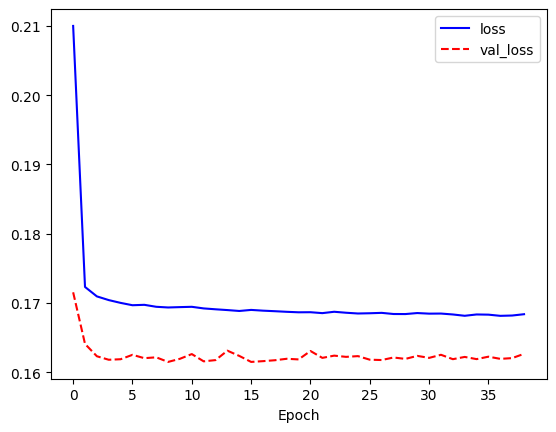

In [389]:
# train loss, val loss 시각화
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [393]:
sample_submission = pd.read_csv('/content/drive/Othercomputers/내 Mac/공모전 준비/sample_submission.csv')

sample_submission["ECLO"] = np.expm1(model.predict(normed_test_data.astype('float32')))

sample_submission.to_csv("/content/drive/Othercomputers/내 Mac/공모전 준비/submission_ver8.csv", index=False)

343/343 [==============================] - 1s 3ms/step


In [394]:
sample_submission

,ID,ECLO
0,ACCIDENT_39609,4.234957
1,ACCIDENT_39610,4.016166
2,ACCIDENT_39611,4.841444
3,ACCIDENT_39612,4.409485
4,ACCIDENT_39613,4.765186
...,...,...
10958,ACCIDENT_50567,5.827683
10959,ACCIDENT_50568,4.232625
10960,ACCIDENT_50569,4.367369
10961,ACCIDENT_50570,4.172606
